## Distribution
<pre>
Violin
Density
Histogram
Boxplot
Ridgeline/Joyplot
</pre>

### Violin
<pre>
바이올린 플롯을 사용하면 하나 또는 여러 그룹에 대한 숫자 변수의 분포를 시각화
할 수 있다.
</pre>

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

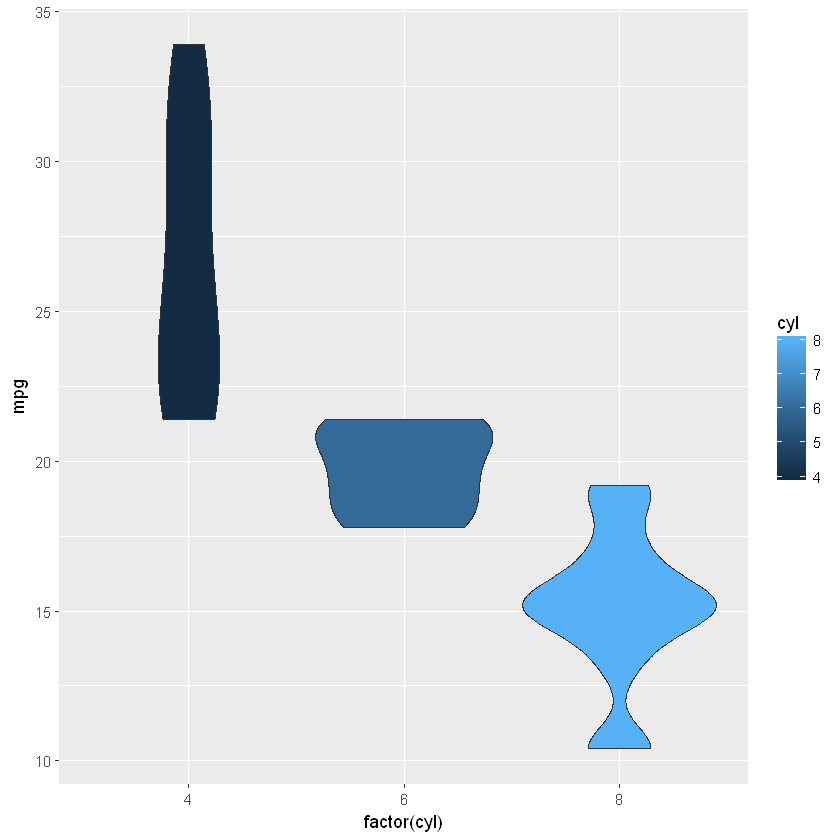

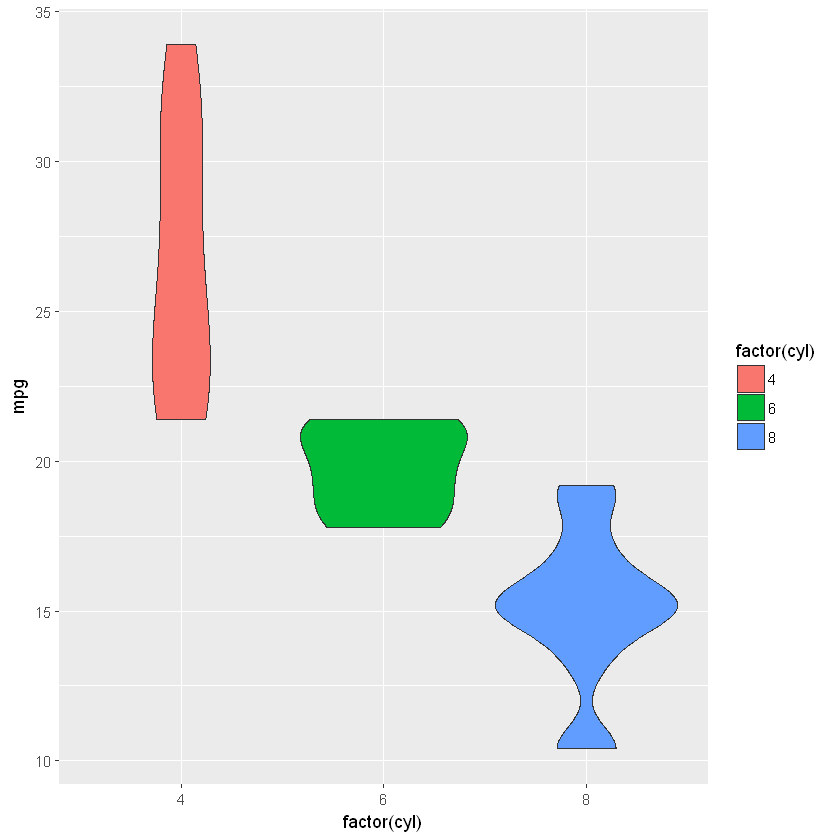

In [1]:
# Library
library(ggplot2)
 
# mtcars data
head(mtcars)
 
# First type of color
ggplot(mtcars, aes(factor(cyl), mpg)) + 
  geom_violin(aes(fill = cyl))
 
# Second type
ggplot(mtcars, aes(factor(cyl), mpg)) +
  geom_violin(aes(fill = factor(cyl))) 

## Boxplot

In [2]:
### 랜덤한 데이터를 생성

In [5]:
a=seq(129,1)+4*runif(129,0.4)
b=seq(1,129)^2+runif(129,0.98)

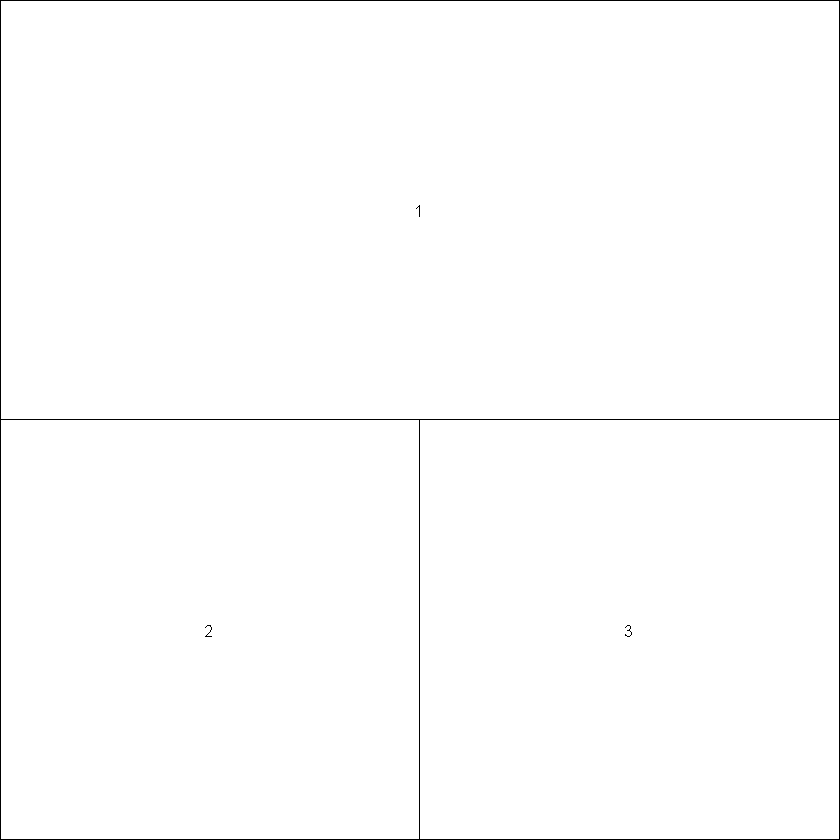

In [6]:
nf=layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
layout.show(nf)

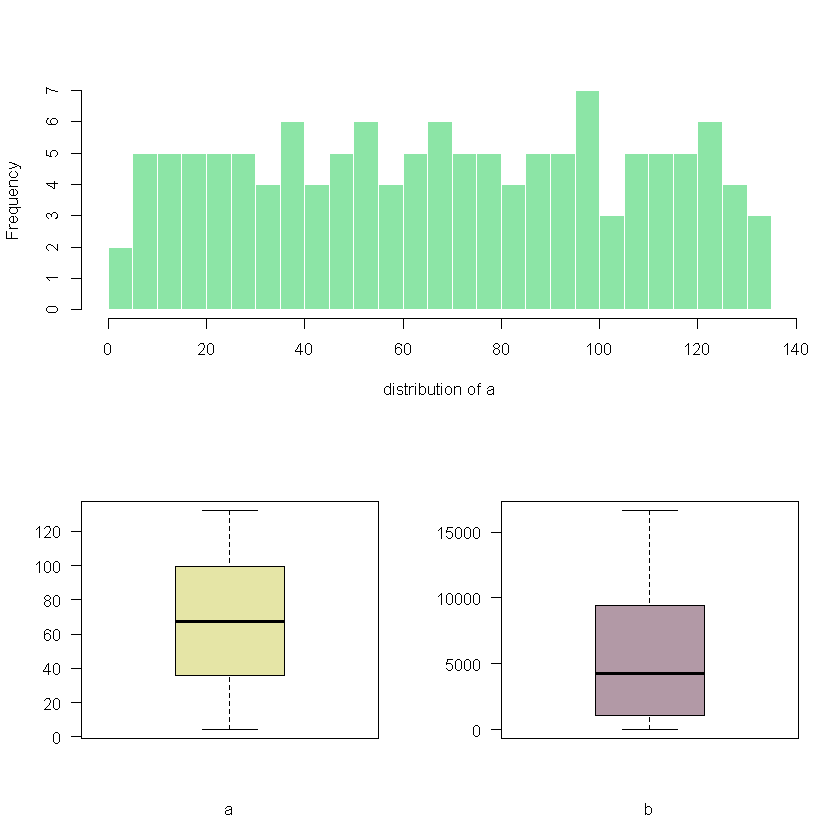

In [7]:
nf=layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
hist(a , breaks=30 , border=F , col=rgb(0.1,0.8,0.3,0.5) , xlab="distribution of a" , main="")
boxplot(a , xlab="a" , col=rgb(0.8,0.8,0.3,0.5) , las=2)
boxplot(b , xlab="b" , col=rgb(0.4,0.2,0.3,0.5) , las=2)

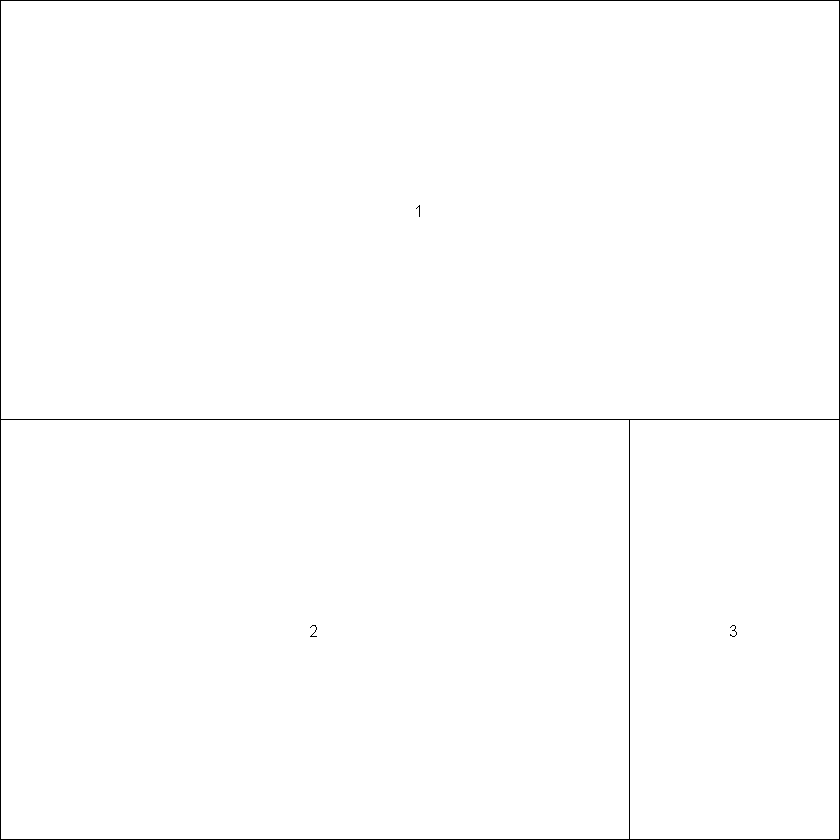

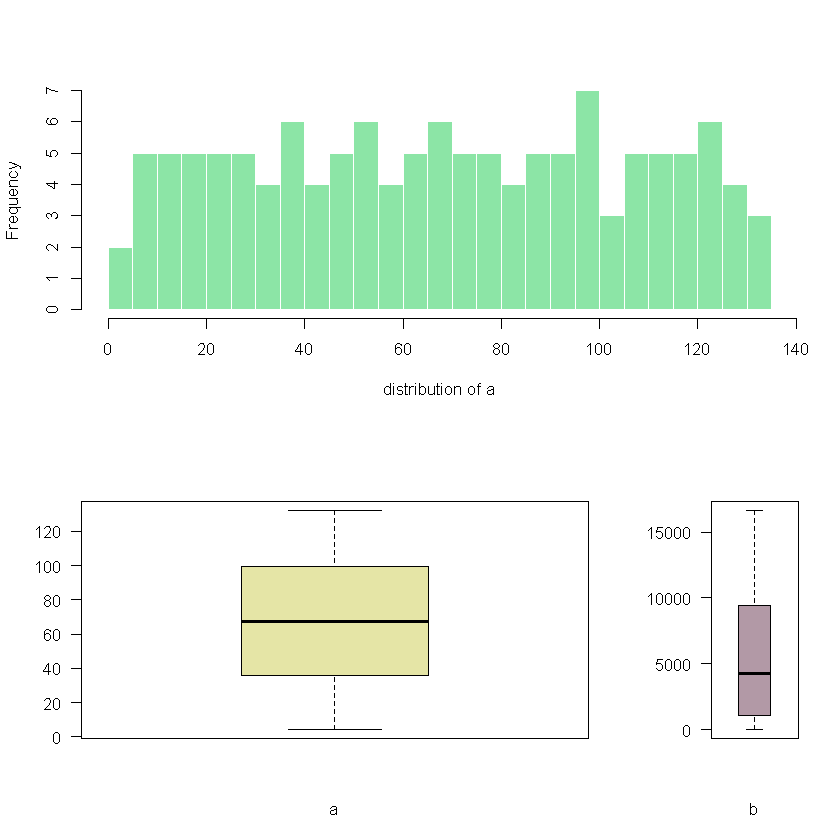

In [8]:
# Set the layout
nf<-layout(matrix(c(1,1,2,3),2,2,byrow=TRUE), c(3,1), c(2,2),TRUE) 
layout.show(nf)
 
#Add the plots
hist(a , breaks=30 , border=F , col=rgb(0.1,0.8,0.3,0.5) , xlab="distribution of a" , main="")
boxplot(a , xlab="a" , col=rgb(0.8,0.8,0.3,0.5) , las=2)
boxplot(b , xlab="b" , col=rgb(0.4,0.2,0.3,0.5) , las=2)

## Heatmap



<img src="img/VIsGis.png">

https://www.r-graph-gallery.com/327-chloropleth-map-from-geojson-with-ggplot2/

geoJSON 데이터에서 ggplot2로 choropleth 맵을 만드는 방법

### 두개가 필요
<pre>
01. 관심있는 지역 단위의 경계를 제공하는 지역 객체
02. 그리고 데이터 
</pre>

### Step 1. Read the geoJSON Object(geoJSON 객체를 읽기)

In [1]:
# install.packages("geojsonio")
# install.packages("broom")
library(broom)

In [9]:
# Geospatial data available in the geojson format!
library(geojsonio)
spdf <- geojson_read("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson",  what = "sp")


Attaching package: 'geojsonio'

The following object is masked _by_ '.GlobalEnv':

    states

The following object is masked from 'package:base':

    pretty



In [10]:
# Since it is a bit to much data, I select only a subset of it:
spdf = spdf[ substr(spdf@data$code,1,2)  %in% c("06", "83", "13", "30", "34", "11", "66") , ]
head(spdf,5)

An object of class "SpatialPolygonsDataFrame"
Slot "data":
    code                 nom
8  06128 Saint-Paul-de-Vence
9  06140              Tignet
10 06097           Pierrefeu
20 11207              Loupia
40 30159            Martinet

Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1]  7.120998 43.695688

Slot "area":
[1] 0.000775086

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
          [,1]     [,2]
 [1,] 7.095666 43.70449
 [2,] 7.105278 43.70846
 [3,] 7.110550 43.71190
 [4,] 7.120304 43.71184
 [5,] 7.130193 43.70412
 [6,] 7.135245 43.69440
 [7,] 7.143228 43.69162
 [8,] 7.141003 43.69100
 [9,] 7.133998 43.68430
[10,] 7.131796 43.67921
[11,] 7.123741 43.67329
[12,] 7.118215 43.68231
[13,] 7.115136 43.69155
[14,] 7.111066 43.69578
[15,] 7.095666 43.70449



Slot "plotOrder":
[1] 1

Slot "labpt":
[1]  7.120998 43.695688

Slot "ID":
[1] "8"

Slot "area":
[1] 0.000775086


[[2]]
An object of class "Po

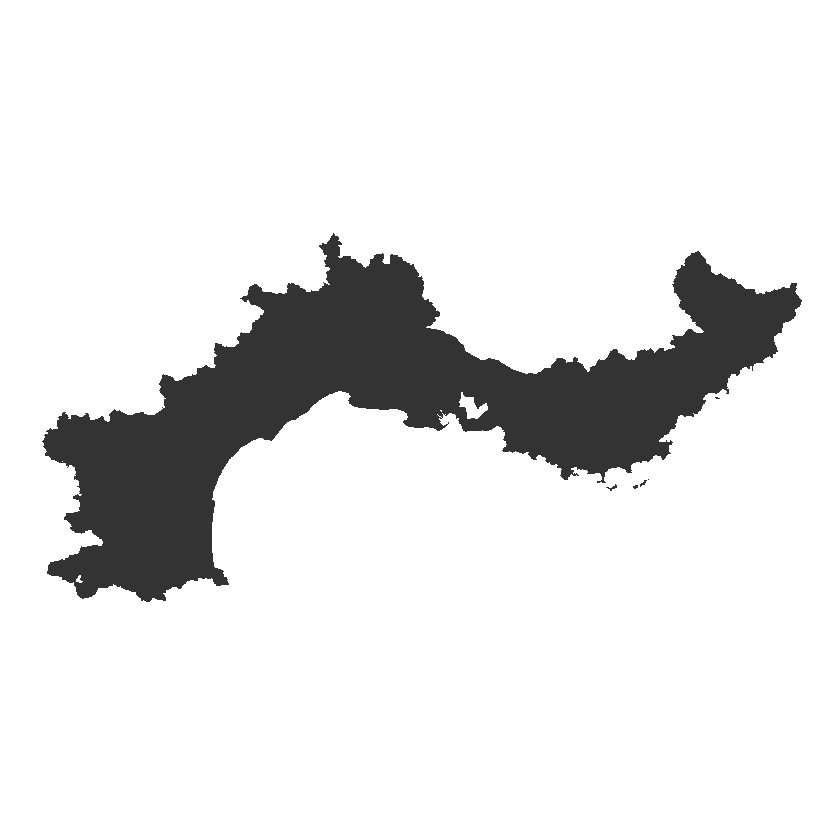

In [11]:
# I need to fortify the data AND keep trace of the commune code! (Takes 2 minutes)
library(broom)
spdf_fortified <- tidy(spdf, region = "code")
 
# Now I can plot this shape easily as described before:
ggplot() +
  geom_polygon(data = spdf_fortified, aes( x = long, y = lat, group = group)) +
  theme_void() +
  coord_map()

## Step 2: 수치형 변수를 읽는다.

reg dep depcom dciris     an   typequ nb_equip
1 84  01  01001  01001      2016 A504    1      
2 84  01  01004  01004_0101 2016 A504    7      
3 84  01  01004  01004_0102 2016 A504   15      
4 84  01  01004  01004_0201 2016 A504   11      
5 84  01  01004  01004_0202 2016 A504    3      
6 84  01  01005  01005      2016 A504    4

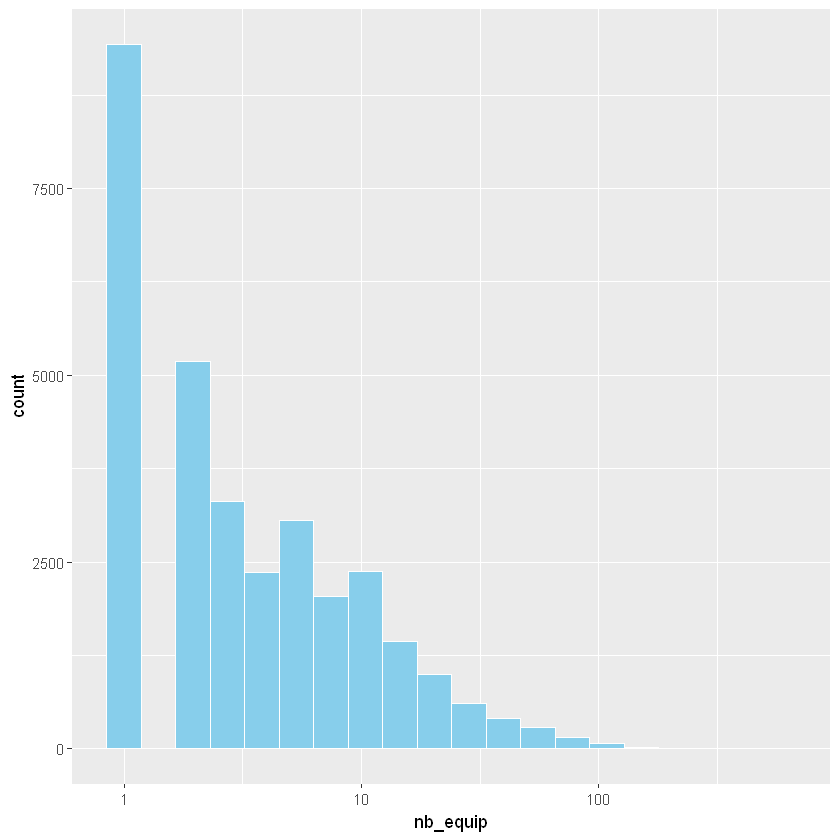

In [12]:
# read data
data=read.table("https://www.r-graph-gallery.com/wp-content/uploads/2017/12/data_on_french_states.csv", header=T, sep=";")
head(data)
 
# Distribution of the number of restaurant?
data %>% ggplot( aes(x=nb_equip)) + geom_histogram(bins=20, fill='skyblue', color='white') + scale_x_log10()

## Stpe 3. Merge them together

In [13]:

# Make the merge
library(dplyr)
spdf_fortified = spdf_fortified %>%
  left_join(. , data, by=c("id"="depcom")) 
 
# Note that if the number of restaurant is NA, it is in fact 0
spdf_fortified$nb_equip[ is.na(spdf_fortified$nb_equip)] = 0.001
 


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"Column `id`/`depcom` joining character vector and factor, coercing into character vector"

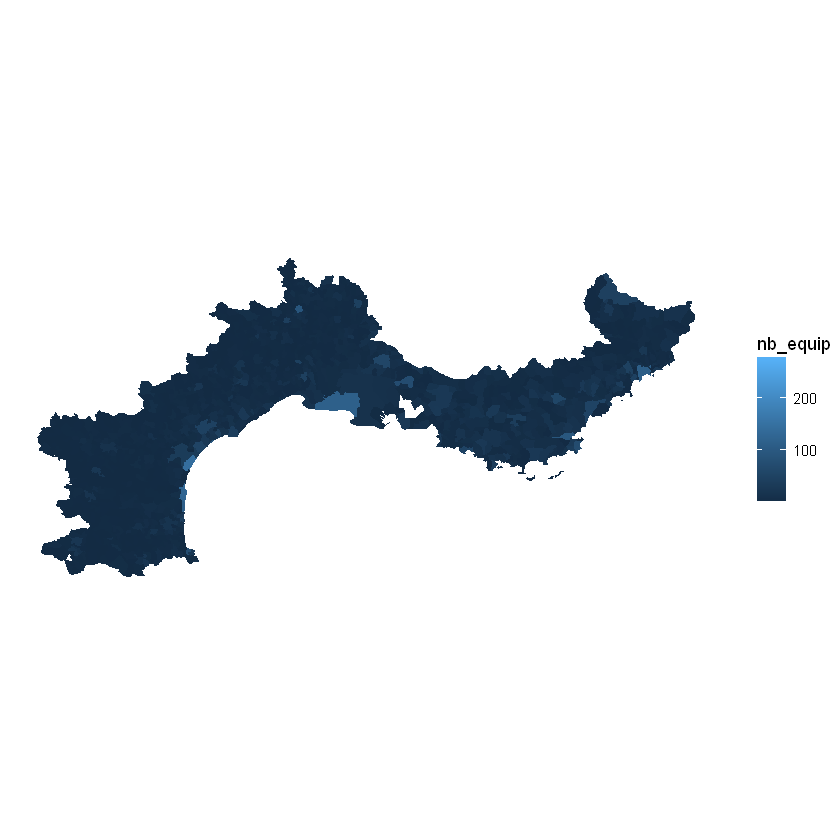

In [14]:
ggplot() +
  geom_polygon(data = spdf_fortified, aes(fill = nb_equip, x = long, y = lat, group = group)) +
  theme_void() +
  coord_map()

## Step 5: 이를 업그레이드 한다.

Loading required package: viridisLite


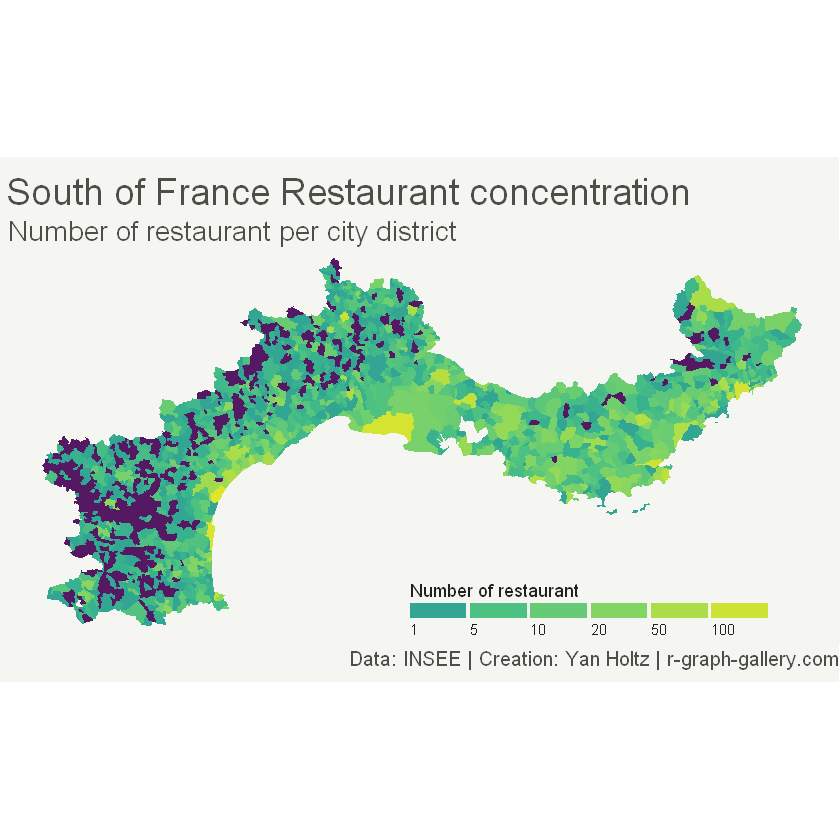

In [15]:
## Step 5:improve this choroplet

library(viridis)
p <- ggplot() +
  geom_polygon(data = spdf_fortified, aes(fill = nb_equip, x = long, y = lat, group = group) , size=0, alpha=0.9) +
  theme_void() +
  scale_fill_viridis(trans = "log", breaks=c(1,5,10,20,50,100), name="Number of restaurant", guide = guide_legend( keyheight = unit(3, units = "mm"), keywidth=unit(12, units = "mm"), label.position = "bottom", title.position = 'top', nrow=1) ) +
  labs(
    title = "South of France Restaurant concentration",
    subtitle = "Number of restaurant per city district", 
    caption = "Data: INSEE | Creation: Yan Holtz | r-graph-gallery.com"
  ) +
  theme(
    text = element_text(color = "#22211d"), 
    plot.background = element_rect(fill = "#f5f5f2", color = NA), 
    panel.background = element_rect(fill = "#f5f5f2", color = NA), 
    legend.background = element_rect(fill = "#f5f5f2", color = NA),
    
    plot.title = element_text(size= 22, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.4, l = 2, unit = "cm")),
    plot.subtitle = element_text(size= 17, hjust=0.01, color = "#4e4d47", margin = margin(b = -0.1, t = 0.43, l = 2, unit = "cm")),
    plot.caption = element_text( size=12, color = "#4e4d47", margin = margin(b = 0.3, r=-99, unit = "cm") ),
    
    legend.position = c(0.7, 0.09)
  ) +
  coord_map()
p

### 04. Ridgeline plot

#### 여러 그룹에 대한 수치 분포를 보여준다. 시간이나 공간에 따른 분포의 변화를 시각화하는데 매우 유용하다.

<img src="img/RidgeLine01.png">

## Correlation - Scatterplot

#### Scatterplot은 2차원 데이터 세트 2개 값을 표시.
#### 각 점은 관찰을 나타낸다.
#### X(가로) 및 Y(세로)축의 값은 2개의 변수를 표시

## Correlation - Bubble
<pre>
버블 플롯은 3차원이 추가 된 산점도입니다.
추가 변수의 값은 점의 크기를 통해 표시된다.
입력으로 3개의 숫자 변수가 필요합니다. 
하나으 X로 표현, 하나는 Y축, 다른 하나는 크기로 표시.

크기와 값 사이의 연결을 가능하게 하는 범례를 제공해야 한다.

대용량 데이터에는 권장되지 않음.
</pre>

In [18]:
# install.packages("plotly")
# install.packages("gapminder")

Installing package into 'C:/Users/WITHJS/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WITHJS\AppData\Local\Temp\RtmpOgSzWc\downloaded_packages


In [19]:
library(ggplot2)
library(plotly)
library(gapminder)
 
p <- gapminder %>%
  filter(year==1977) %>%
  ggplot( aes(gdpPercap, lifeExp, size = pop, color=continent)) +
  geom_point() +
  scale_x_log10() +
  theme_bw()
 
ggplotly(p)


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`
Warning message in readChar(htmlfile, file.info(htmlfile)$size):
"UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다"

HTML widgets cannot be represented in plain text (need html)

In [20]:
# Make data
a=rnorm(100)
b=sample( c(1:10) , 100 , replace=T)
 
# Plotly library
library(plotly)
 
# Make the graph
my_graph=plot_ly(x=b , y=a , mode="markers" , size=abs(a)/2 , color=ifelse(a>0,"blue","red") ) %>% 
 
#Change hover mode in the layout argument :
layout( hovermode="closest" )
 
# show the graph
my_graph

No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"Warning message in readChar(htmlfile, file.info(htmlfile)$size):
"UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다"

HTML widgets cannot be represented in plain text (need html)

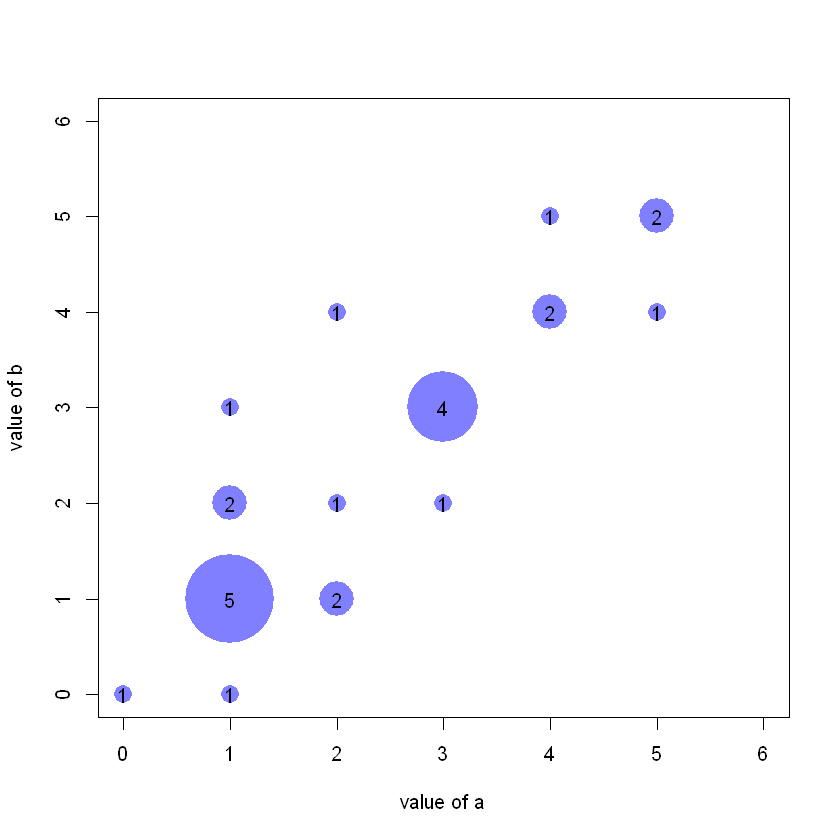

In [21]:
#Let's create 2 discrete variables 
a=c(1,1,3,4,5,5,1,1,2,3,4,1,3,2,1,1,5,1,4,3,2,3,1,0,2)
b=c(1,2,3,5,5,5,2,1,1,3,4,3,3,4,1,1,4,1,4,2,2,3,0,0,1)
 
#I count the occurence of each couple of values. Eg : number of time a=1 and b=1, number of time a=1 and b=2 etc...
AA=xyTable(a,b)
 
#Now I can plot this ! I represent the dots as big as the couple occurs often
coeff_bigger=2
plot(AA$x , AA$y , cex=AA$number*coeff_bigger  , pch=16 , col=rgb(0,0,1,0.5) , xlab= "value of a" , ylab="value of b" , xlim=c(0,6) , ylim=c(0,6) )
text (AA$x , AA$y , AA$number )
 
#Note : It's easy to make a function that will compute this kind of plot automaticaly :
represent_discrete_variable=function(var1, var2 , coeff_bigger){
  AA=xyTable(var1,var2)
  plot(AA$x , AA$y , cex=AA$number*coeff_bigger  , pch=16 , col="chocolate1" , xlab= "value of a" , ylab="value of b" )
  text (AA$x , AA$y , AA$number )
}

## Correlation - 2D DENSITY CHART

In [24]:
# install.packages("tidyverse")

Installing package into 'C:/Users/WITHJS/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WITHJS\AppData\Local\Temp\RtmpOgSzWc\downloaded_packages


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, plotly, stats
lag():    dplyr, stats


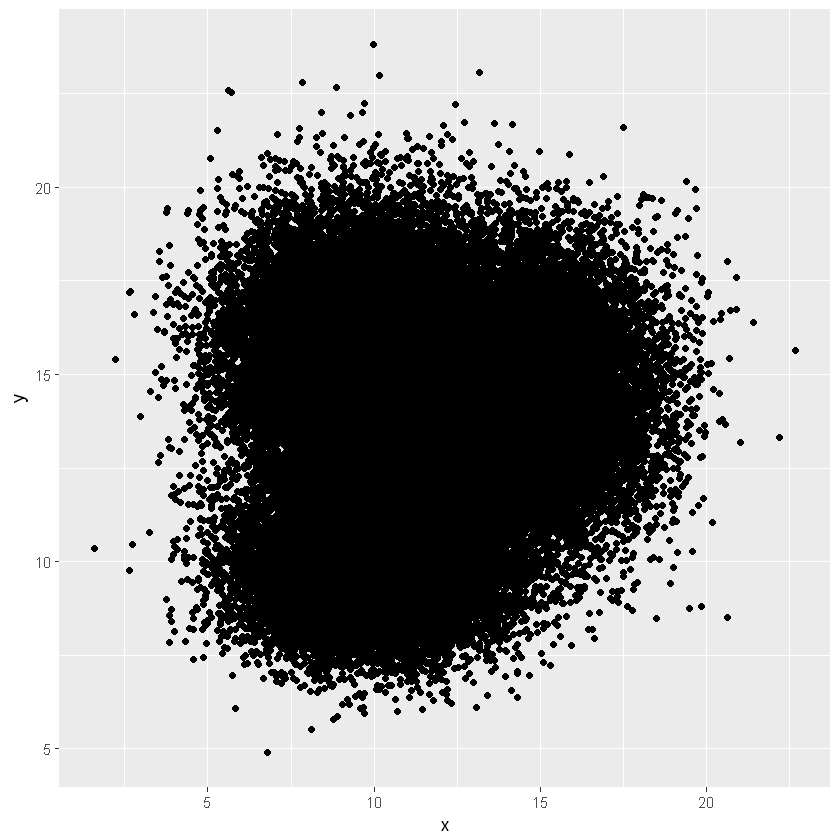

In [25]:
# Library
library(tidyverse)
 
# Data
a <- data.frame( x=rnorm(20000, 10, 1.9), y=rnorm(20000, 10, 1.2) )
b <- data.frame( x=rnorm(20000, 14.5, 1.9), y=rnorm(20000, 14.5, 1.9) )
c <- data.frame( x=rnorm(20000, 9.5, 1.9), y=rnorm(20000, 15.5, 1.9) )
data <- rbind(a,b,c)
 
 
# Basic scatterplot
ggplot(data, aes(x=x, y=y) ) +
  geom_point()

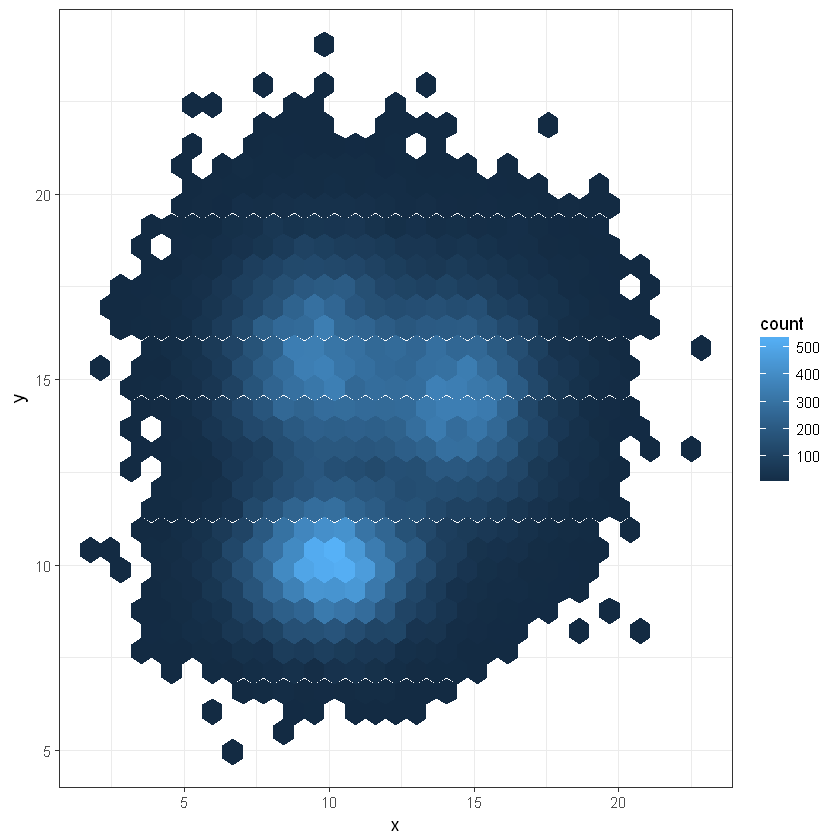

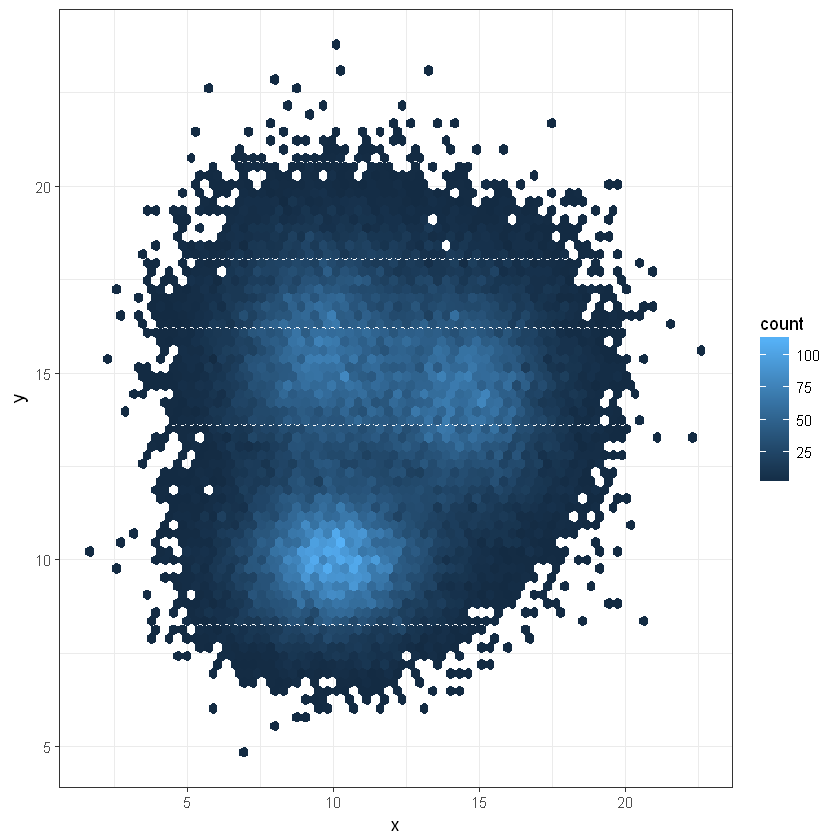

In [26]:
ggplot(data, aes(x=x, y=y) ) +
  geom_hex() +
  theme_bw()
 
# Number of bins in each direction?
ggplot(data, aes(x=x, y=y) ) +
  geom_hex(bins = 70) +
  theme_bw()

### Density - 2d Distribution

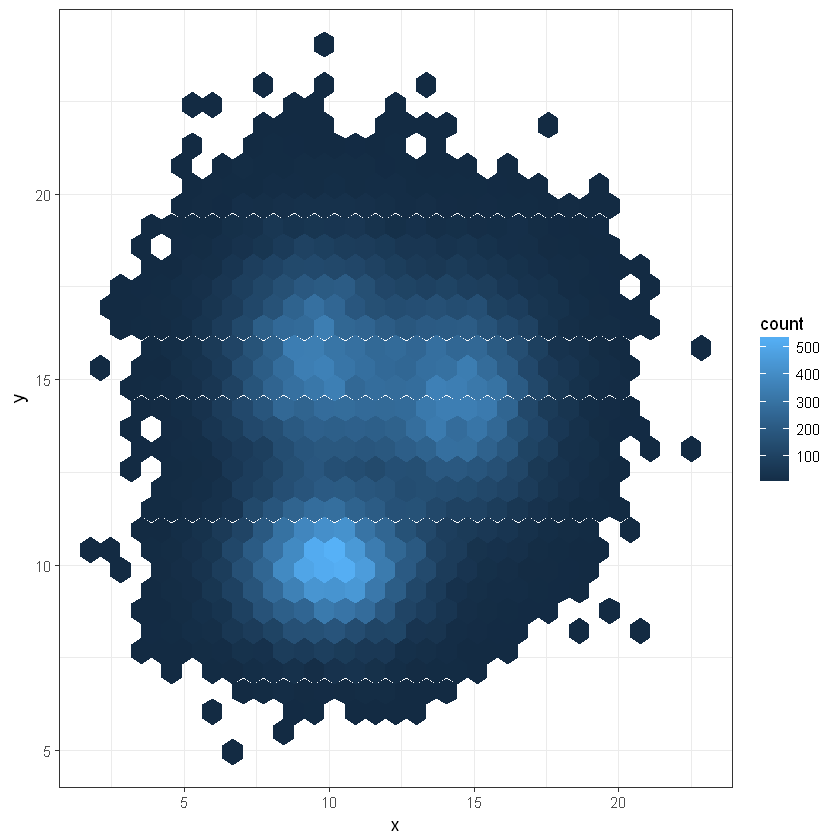

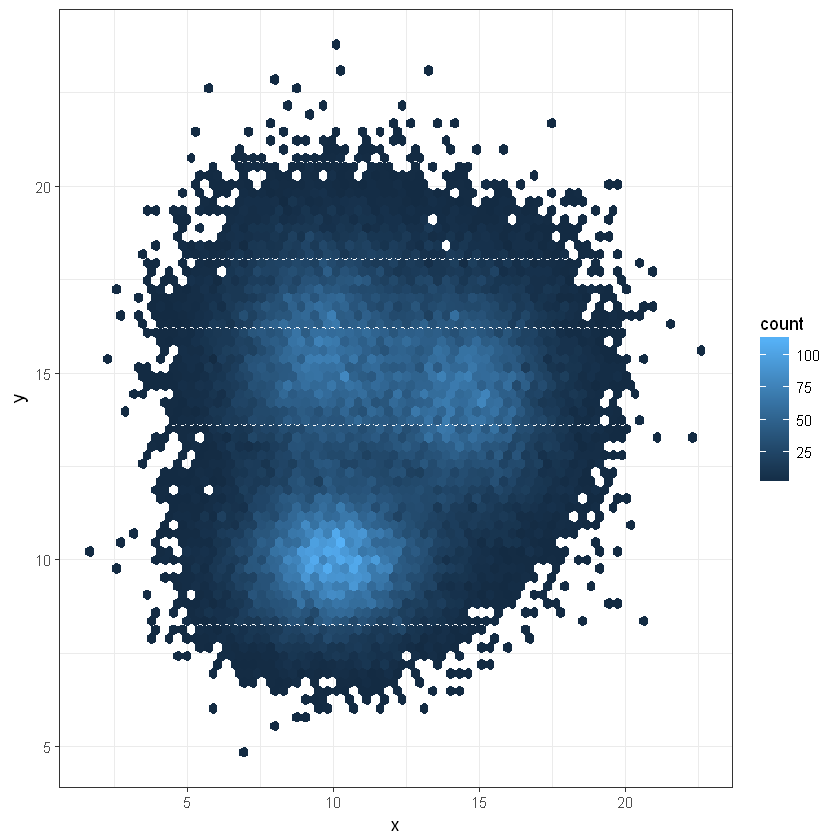

In [28]:
ggplot(data, aes(x=x, y=y) ) +
  geom_hex() +
  theme_bw()
 
# Number of bins in each direction?
ggplot(data, aes(x=x, y=y) ) +
  geom_hex(bins = 70) +
  theme_bw()

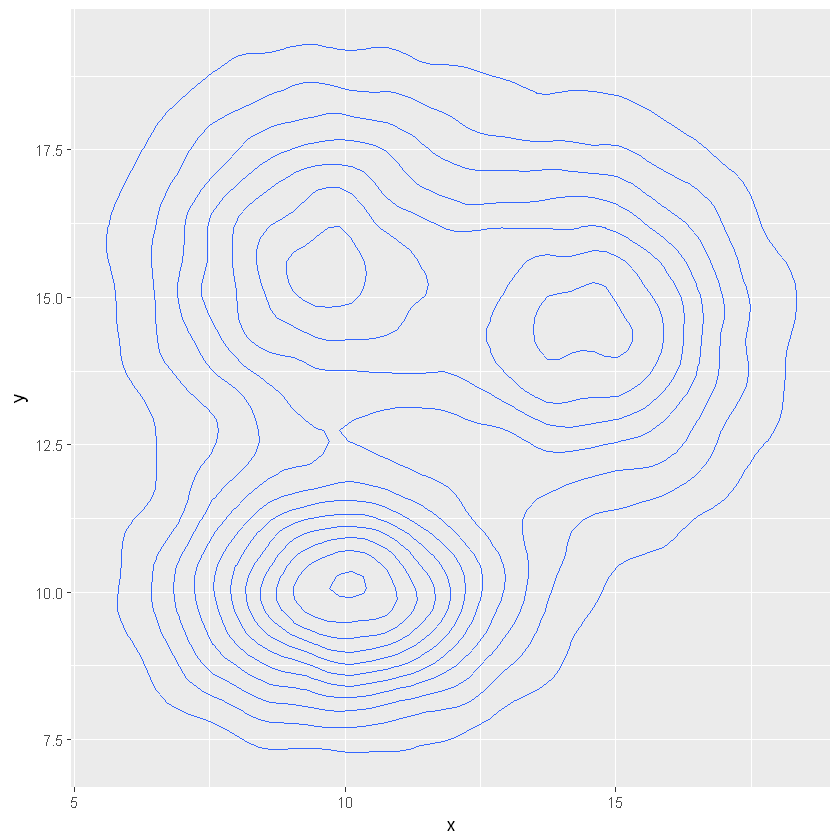

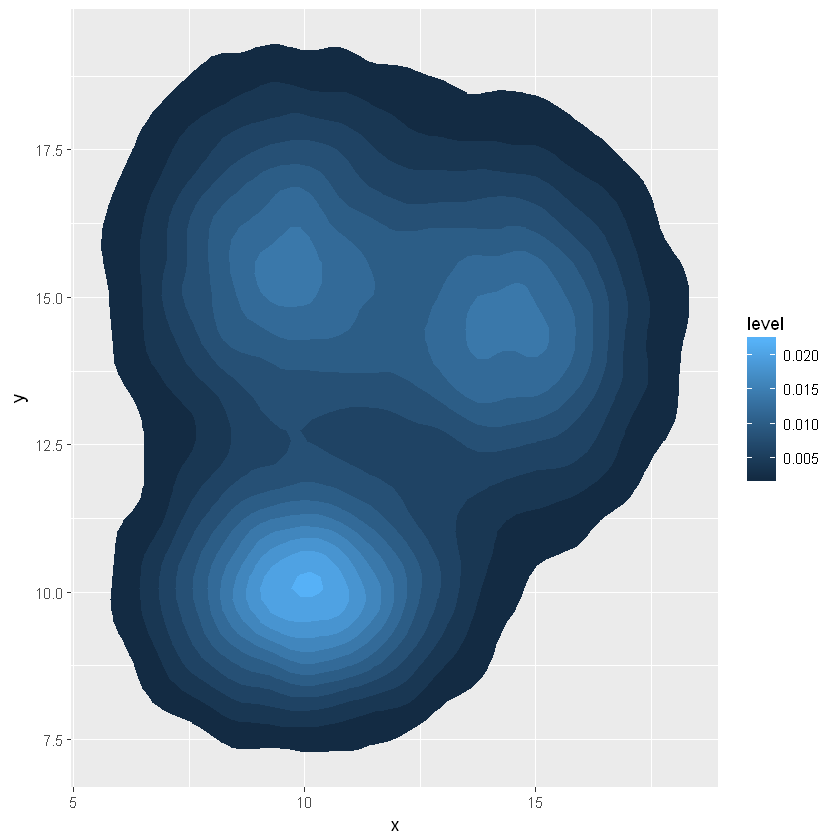

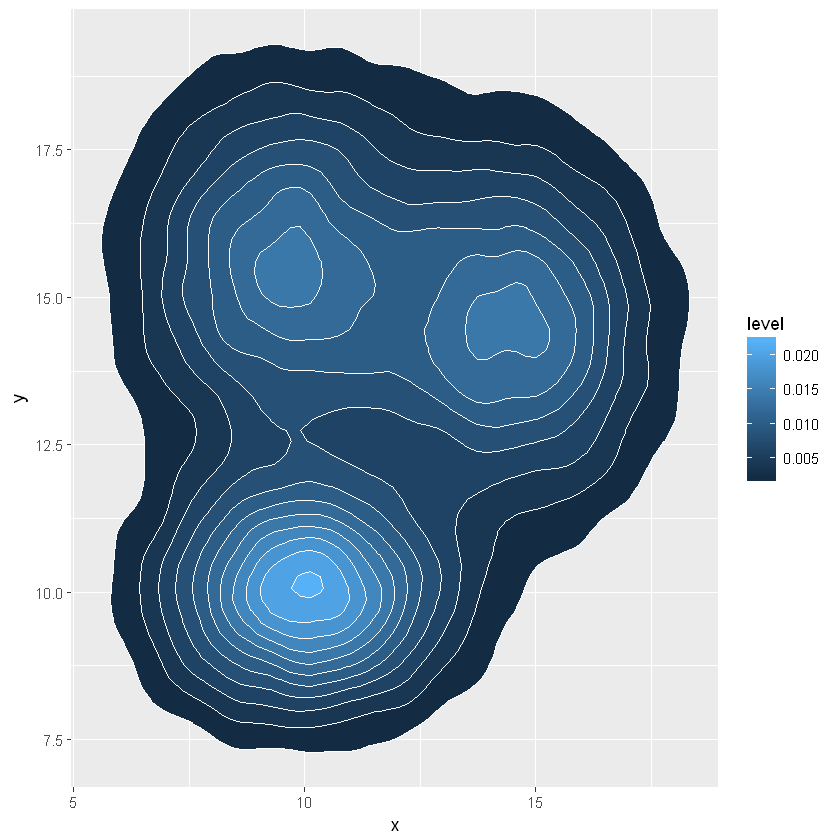

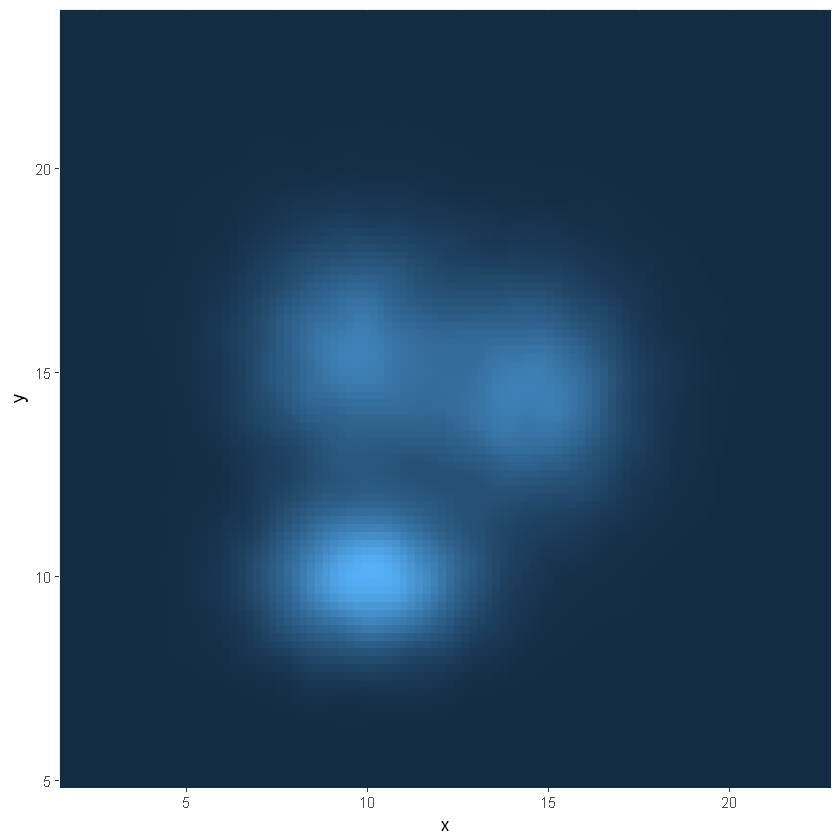

In [29]:
# Show the contour only
ggplot(data, aes(x=x, y=y) ) +
  geom_density_2d()
 
# Show the area only
ggplot(data, aes(x=x, y=y) ) +
  stat_density_2d(aes(fill = ..level..), geom = "polygon")
 
# Area + contour
ggplot(data, aes(x=x, y=y) ) +
  stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white")
 
# Using raster
ggplot(data, aes(x=x, y=y) ) +
  stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  theme(
    legend.position='none'
  )

## Lollipop
<pre>
롤리팝 플롯은 분산형 플롯과 Barplot간의 하이브리드이다.
그것은 숫자 변수와 다른 변수 숫자와 범주형 관계를 보여준다.각 그룹에 대한 두 개의 수치값을 비교할 수 있다.
ggplot2 라이브러리를 사용하여 아래에 설명 된대로 
geom_segment ()와 geom_point ()의 조합을 사용하여 스템 플롯을 작성할 수 있습니다.
</pre>

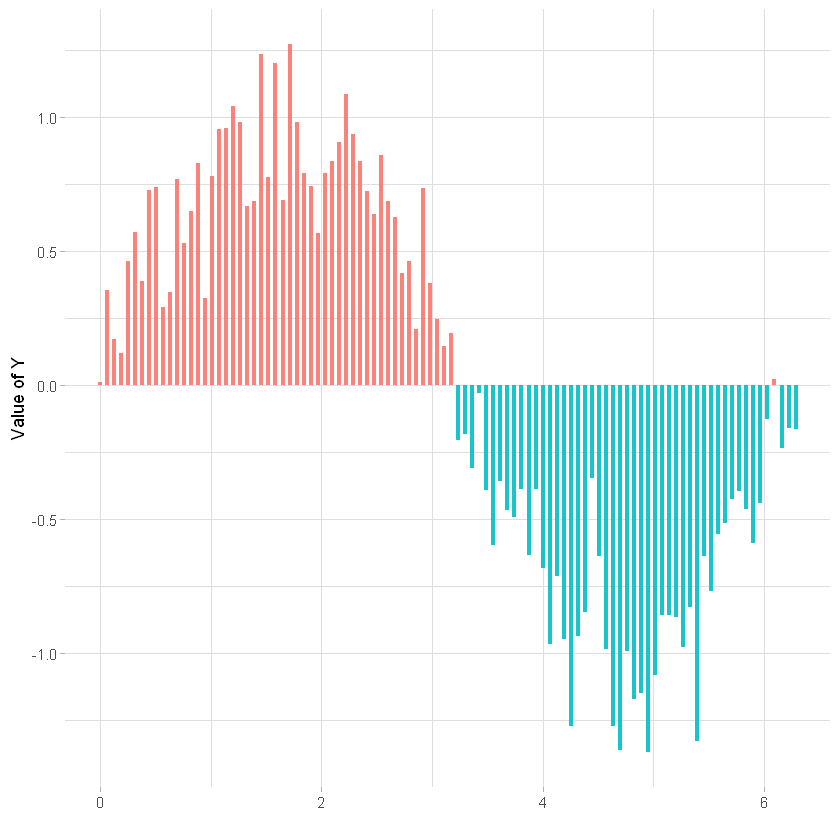

In [31]:
# Create data (this takes more sense with a numerical X axis)
x=seq(0, 2*pi, length.out=100)
data=data.frame(x=x, y=sin(x) + rnorm(100, sd=0.2))
 
# Add a column with your condition for the color
data=data %>% mutate(mycolor = ifelse(y>0, "type1", "type2"))
 
# plot
ggplot(data, aes(x=x, y=y)) +
  geom_segment( aes(x=x, xend=x, y=0, yend=y, color=mycolor), size=1.3, alpha=0.9) +
  theme_light() +
  theme(
    legend.position = "none",
    panel.border = element_blank(),
  ) +
  xlab("") +
  ylab("Value of Y")

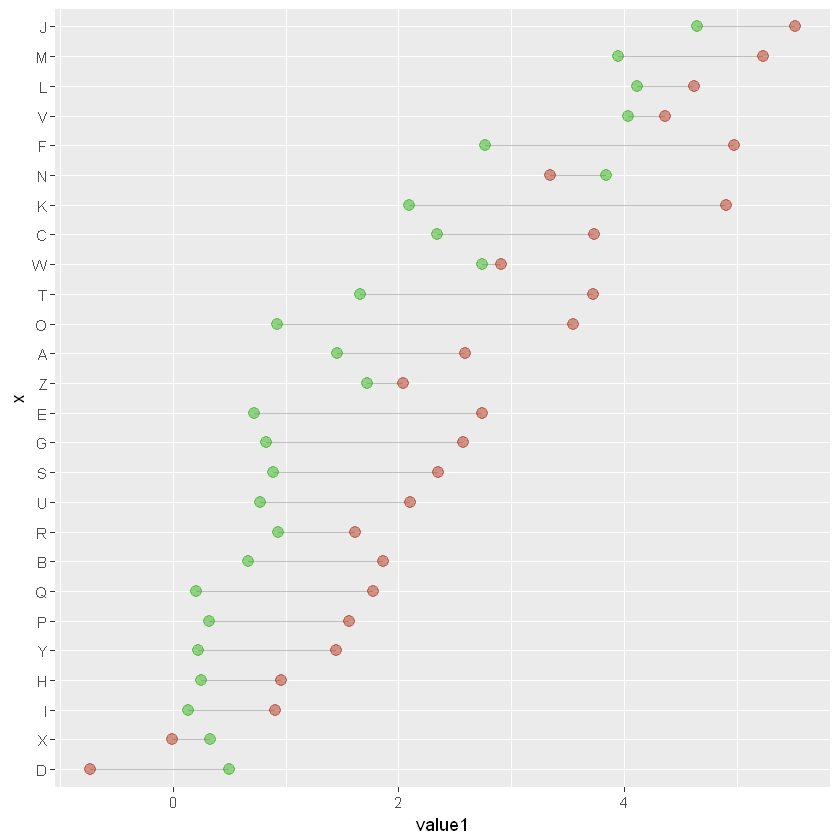

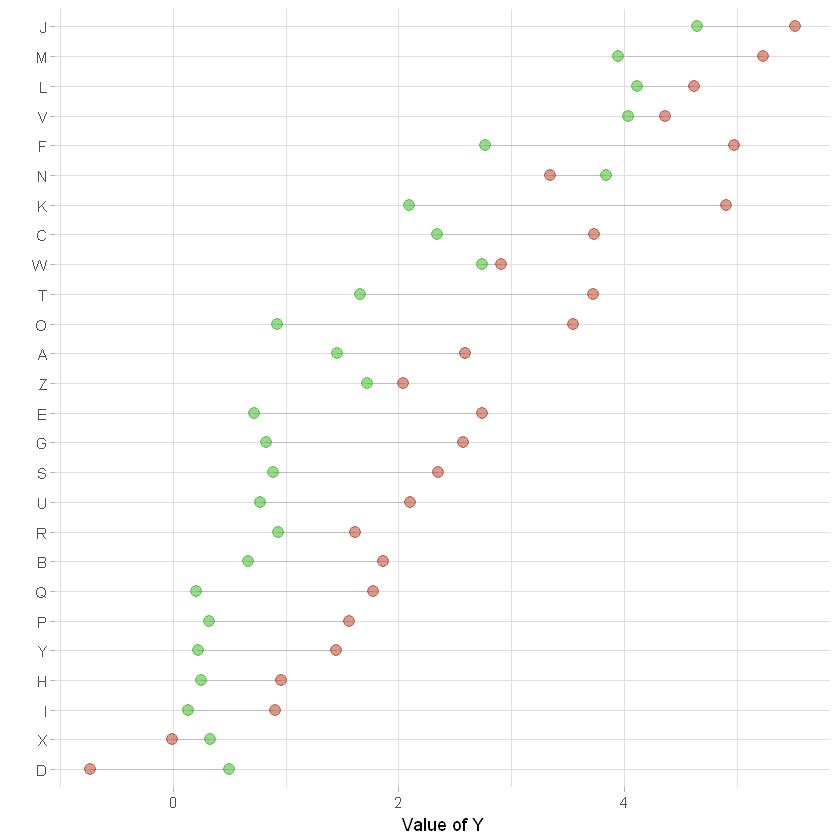

In [35]:
# Library
library(tidyverse)
 
# Create data
value1=abs(rnorm(26))*2
data=data.frame(x=LETTERS[1:26], value1=value1, value2=value1+1+rnorm(26, sd=1) )
 
# Reorder data using average?
data = data %>% rowwise() %>% 
          mutate( mymean = mean(c(value1,value2) )) %>% 
          arrange(mymean) %>% mutate(x=factor(x, x))
 
# plot
ggplot(data) +
  geom_segment( aes(x=x, xend=x, y=value1, yend=value2), color="grey") +
  geom_point( aes(x=x, y=value1), color=rgb(0.2,0.7,0.1,0.5), size=3 ) +
  geom_point( aes(x=x, y=value2), color=rgb(0.7,0.2,0.1,0.5), size=3 ) +
  coord_flip() 
 
# With a bit more style
ggplot(data) +
  geom_segment( aes(x=x, xend=x, y=value1, yend=value2), color="grey") +
  geom_point( aes(x=x, y=value1), color=rgb(0.2,0.7,0.1,0.5), size=3 ) +
  geom_point( aes(x=x, y=value2), color=rgb(0.7,0.2,0.1,0.5), size=3 ) +
  coord_flip()+
  theme_light() +
  theme(
    legend.position = "none",
    panel.border = element_blank(),
  ) +
  xlab("") +
  ylab("Value of Y")

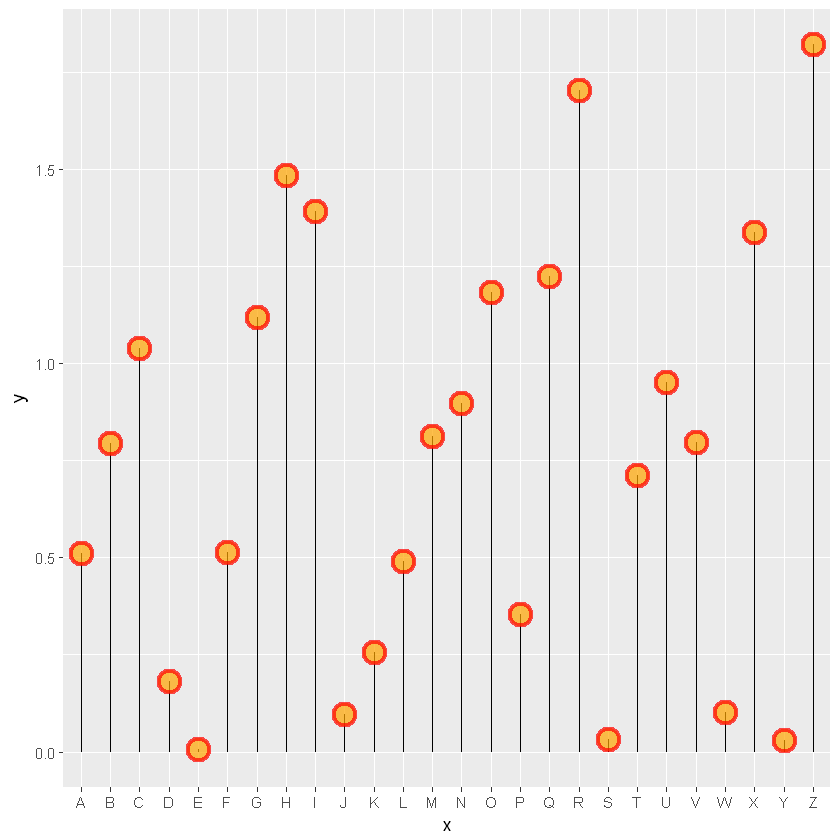

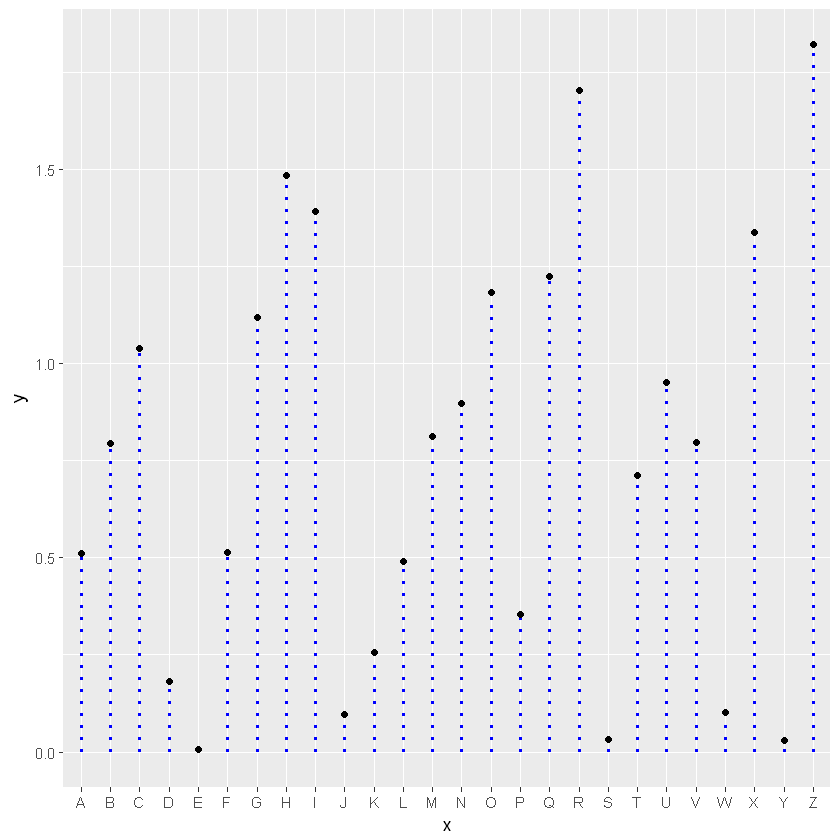

In [36]:
# Library
library(tidyverse)
 
# Create data
data=data.frame(x=LETTERS[1:26], y=abs(rnorm(26)))
 
# 1 - Custom markers (left)
# note: shape = integer between 0 and 25
# note: stroke exists only for shapes between 1 and 24
ggplot(data, aes(x=x, y=y)) +
  geom_segment( aes(x=x, xend=x, y=0, yend=y)) +
  geom_point( size=5, color="red", fill=alpha("orange", 0.3), alpha=0.7, shape=21, stroke=2) 
 
# 2 - Custom stems (right)
# note: size is the width in mm
# note: style can be in: "blank", "solid", "dashed", "dotted", "dotdash", "longdash","twodash"
ggplot(data, aes(x=x, y=y)) +
  geom_segment( aes(x=x, xend=x, y=0, yend=y) , size=1, color="blue", linetype="dotted" ) +
  geom_point()
 

## Ranking - circular barplot
<pre>
원형 바(barplot)은 바(barplot)이며 각 bar는 선 대신 원을 따라 표시됩니다. 따라서 Barplot을 원형으로 만들기 전에 어떻게 작동하는지 잘 이해하는 것이 좋습니다.
긴 선보다 공간을 더 잘 사용할 수 있다.

원형 막대 그래프는 표시할 막대의 수가 많고 그룹 간의 뚜렷한 차이가 있는 경우에 의미가 있다.
ggplot2, coord_polar()
</pre>

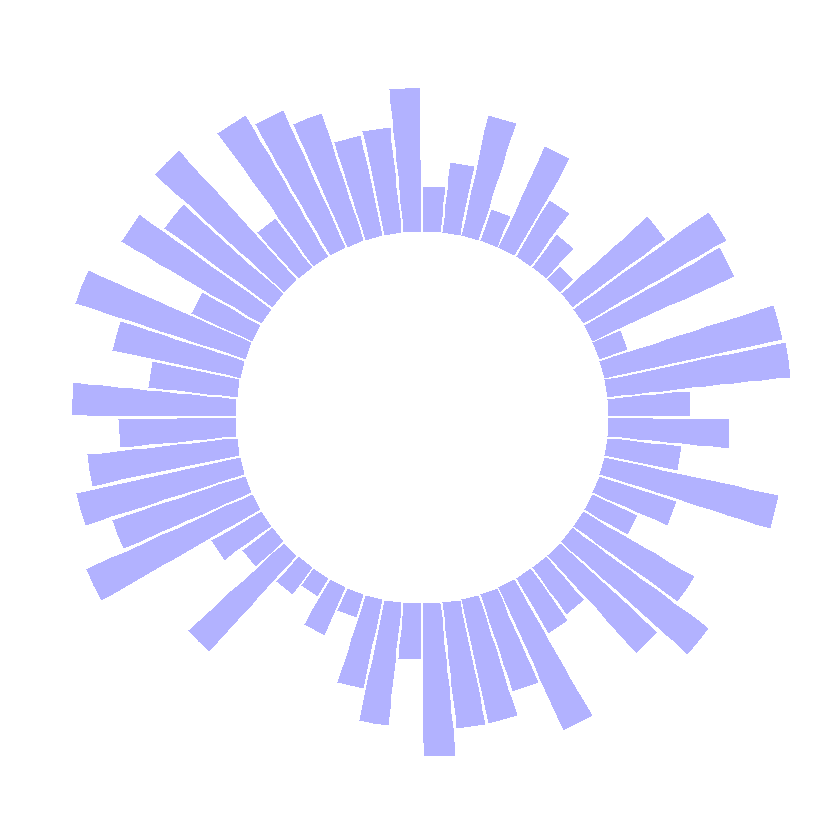

In [37]:
# Libraries
library(tidyverse)
 
# Create dataset
data=data.frame(
  id=seq(1,60),
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# Make the plot
p = ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("blue", 0.3)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-100,120) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2,4), "cm")     # This remove unnecessary margin around plot
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0)
p
 

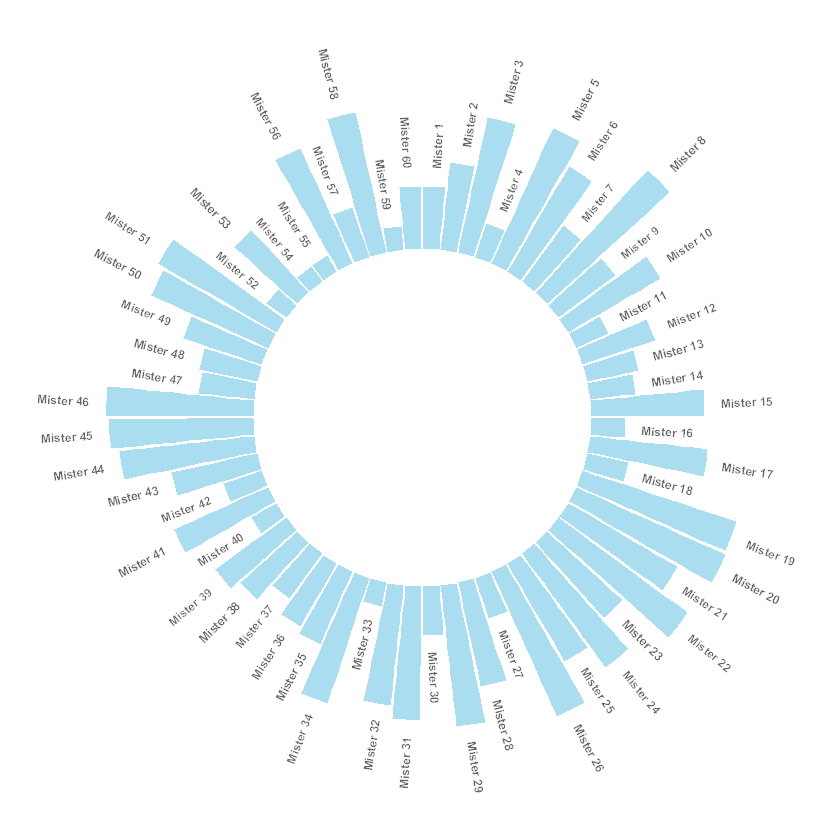

In [38]:
# Libraries
library(tidyverse)
 
# Create dataset
data=data.frame(
  id=seq(1,60),
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# ----- This section prepare a dataframe for labels ---- #
# Get the name and the y position of each label
label_data=data
 
# calculate the ANGLE of the labels
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
# ----- ------------------------------------------- ---- #
 
 
# Start the plot
p = ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-100,120) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")      # Adjust the margin to make in sort labels are not truncated!
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p
 

Warning message:
"Removed 10 rows containing missing values (position_stack)."Warning message:
"Removed 10 rows containing missing values (geom_text)."

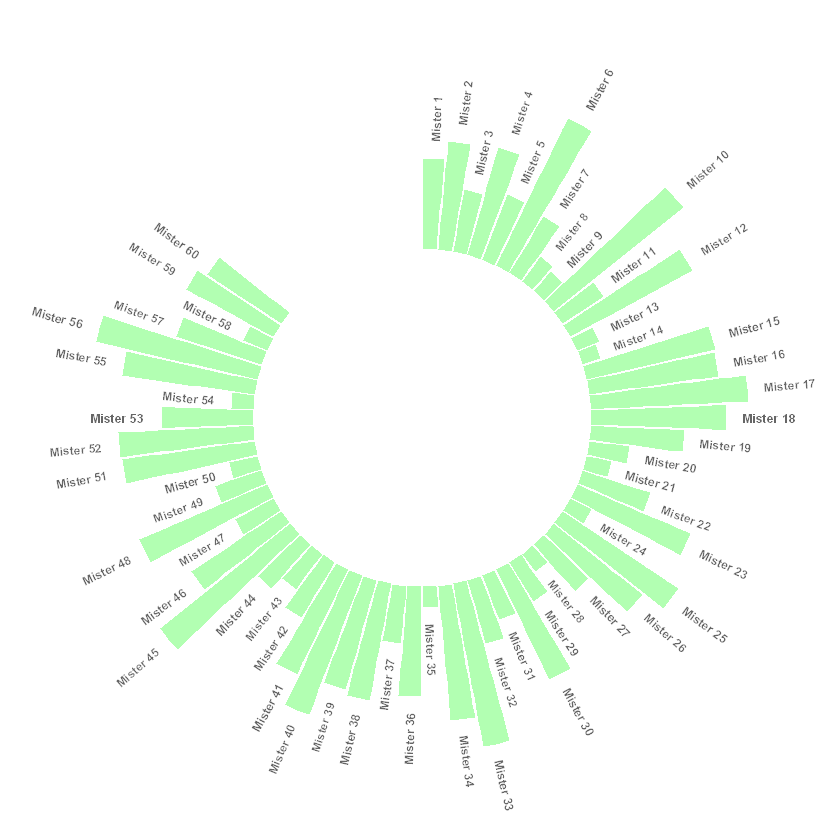

In [39]:
# library
library(tidyverse)
 
# Create dataset
data=data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar'
empty_bar=10
 
# Add lines to the initial dataset
to_add = matrix(NA, empty_bar, ncol(data))
colnames(to_add) = colnames(data)
data=rbind(data, to_add)
data$id=seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data=data
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust<-ifelse( angle < -90, 1, 0)
label_data$angle<-ifelse(angle < -90, angle+180, angle)
 
# Make the plot
p = ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill=alpha("green", 0.3)) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p

Warning message:
"Removed 12 rows containing missing values (position_stack)."Warning message:
"Removed 12 rows containing missing values (position_stack)."Warning message:
"Removed 12 rows containing missing values (geom_text)."

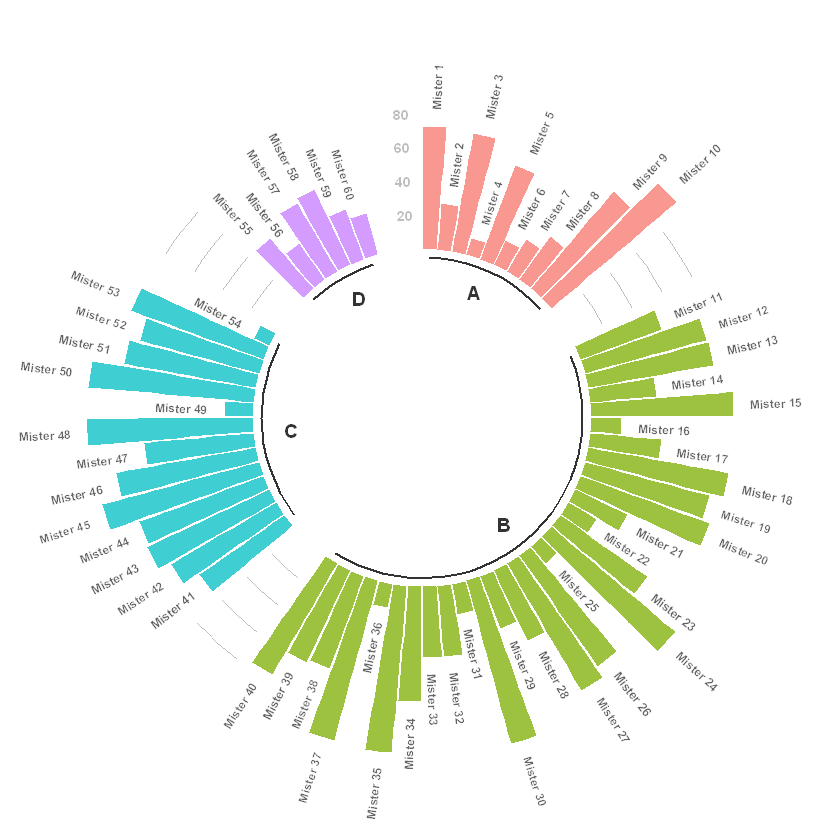

In [40]:
# library
library(tidyverse)
 
# Create dataset
data=data.frame(
  individual=paste( "Mister ", seq(1,60), sep=""),
  group=c( rep('A', 10), rep('B', 30), rep('C', 14), rep('D', 6)) ,
  value=sample( seq(10,100), 60, replace=T)
)
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar=3
to_add = data.frame( matrix(NA, empty_bar*nlevels(data$group), ncol(data)) )
colnames(to_add) = colnames(data)
to_add$group=rep(levels(data$group), each=empty_bar)
data=rbind(data, to_add)
data=data %>% arrange(group)
data$id=seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data=data
number_of_bar=nrow(label_data)
angle= 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust<-ifelse( angle < -90, 1, 0)
label_data$angle<-ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data=data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data = base_data
grid_data$end = grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start = grid_data$start - 1
grid_data=grid_data[-1,]
 
# Make the plot
p = ggplot(data, aes(x=as.factor(id), y=value, fill=group)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
  geom_segment(data=grid_data, aes(x = end, y = 80, xend = start, yend = 80), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 60, xend = start, yend = 60), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 40, xend = start, yend = 40), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  geom_segment(data=grid_data, aes(x = end, y = 20, xend = start, yend = 20), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
  
  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(20, 40, 60, 80), label = c("20", "40", "60", "80") , color="grey", size=3 , angle=0, fontface="bold", hjust=1) +
  
  geom_bar(aes(x=as.factor(id), y=value, fill=group), stat="identity", alpha=0.5) +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() + 
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) +
  
  # Add base line information
  geom_segment(data=base_data, aes(x = start, y = -5, xend = end, yend = -5), colour = "black", alpha=0.8, size=0.6 , inherit.aes = FALSE )  +
  geom_text(data=base_data, aes(x = title, y = -18, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=4, fontface="bold", inherit.aes = FALSE)
 
p

## Part of a whole
### Treemap
### Dendrogram
### Venn Diagram
### Pie Chart
### Doughnut

### 01. Treemap

In [42]:
install.packages("treemap")

Installing package into 'C:/Users/WITHJS/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependency 'gridBase'



package 'gridBase' successfully unpacked and MD5 sums checked
package 'treemap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WITHJS\AppData\Local\Temp\RtmpOgSzWc\downloaded_packages


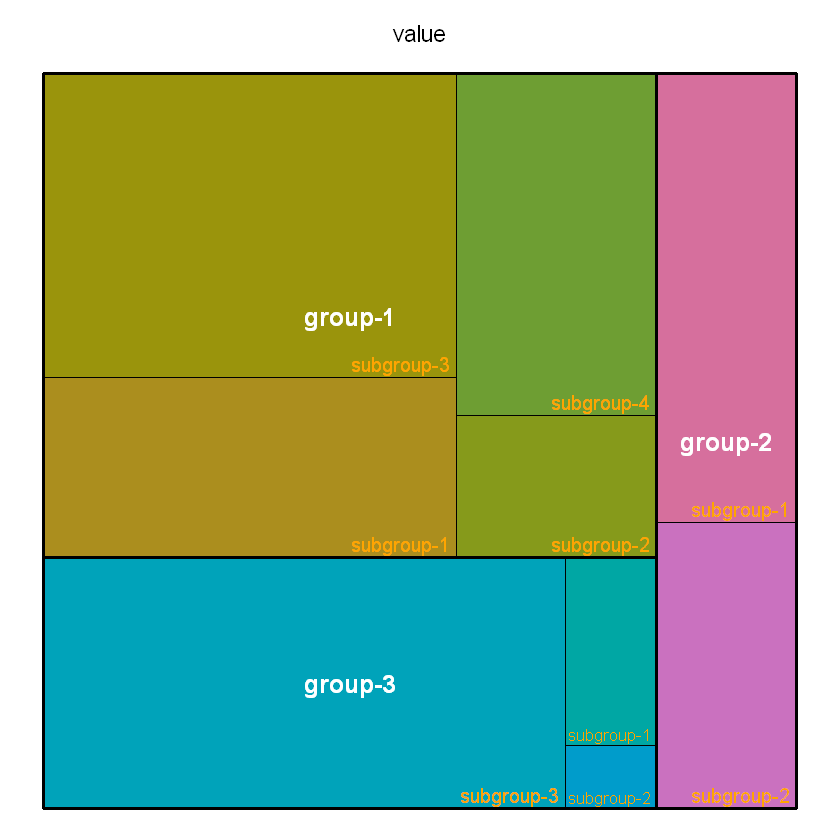

In [43]:
# library
library(treemap)
 
# Create data
group=c(rep("group-1",4),rep("group-2",2),rep("group-3",3))
subgroup=paste("subgroup" , c(1,2,3,4,1,2,1,2,3), sep="-")
value=c(13,5,22,12,11,7,3,1,23)
data=data.frame(group,subgroup,value)
 
# Custom labels:
treemap(data, index=c("group","subgroup"),     vSize="value", type="index",
 
    fontsize.labels=c(15,12),                # size of labels. Give the size per level of aggregation: size for group, size for subgroup, sub-subgroups...
    fontcolor.labels=c("white","orange"),    # Color of labels
    fontface.labels=c(2,1),                  # Font of labels: 1,2,3,4 for normal, bold, italic, bold-italic...
    bg.labels=c("transparent"),              # Background color of labels
    align.labels=list(
        c("center", "center"), 
        c("right", "bottom")
        ),                                   # Where to place labels in the rectangle?
    overlap.labels=0.5,                      # number between 0 and 1 that determines the tolerance of the overlap between labels. 0 means that labels of lower levels are not printed if higher level labels overlap, 1  means that labels are always printed. In-between values, for instance the default value .5, means that lower level labels are printed if other labels do not overlap with more than .5  times their area size.
    inflate.labels=F,                        # If true, labels are bigger when rectangle is bigger.
 
)

### 02. Dendrogram
<pre>
여러 요소의 계층적 구성을 설명한다. 예를 들어 가계도를 만들기 위해 자주 사용.
루트 노드로 구성되며, 리프 노드를 제공하므로써 끝나는 노드 생성.

두 가지 유형의 데이터 세트를 만들 수 있음.
(1) 숫자 행렬을 구하고 개인 간의 거리를 계산하여 클러스터링하기
(2) 계층적 데이터 세트 간의 관계가 직접 제공되는 데이터 집합.
</pre>

In [45]:
# Dataset 
sample=paste(rep("sample_",24) , seq(1,24) , sep="")
specie=c(rep("dicoccoides" , 8) , rep("dicoccum" , 8) , rep("durum" , 8))
treatment=rep(c(rep("High",4 ) , rep("Low",4)),3)
data=data.frame(sample,specie,treatment)
for (i in seq(1:5)){
  gene=sample(c(1:40) , 24 )
  data=cbind(data , gene)
  colnames(data)[ncol(data)]=paste("gene_",i,sep="")
 }
data[data$treatment=="High" , c(4:8)]=data[data$treatment=="High" , c(4:8)]+100
data[data$specie=="durum" , c(4:8)]=data[data$specie=="durum" , c(4:8)]-30
data

sample    specie      treatment gene_1 gene_2 gene_3 gene_4 gene_5
1  sample_1  dicoccoides High      117    140    130    101    130   
2  sample_2  dicoccoides High      107    131    110    134    112   
3  sample_3  dicoccoides High      113    115    106    122    131   
4  sample_4  dicoccoides High      104    102    116    136    134   
5  sample_5  dicoccoides Low        11      6     19     19     27   
6  sample_6  dicoccoides Low        10      1      1     11     18   
7  sample_7  dicoccoides Low        29     11     37     14     19   
8  sample_8  dicoccoides Low        26     29     12     12     36   
9  sample_9  dicoccum    High      122    110    128    109    138   
10 sample_10 dicoccum    High      132    139    107    107    104   
11 sample_11 dicoccum    High      133    137    109    139    110   
12 sample_12 dicoccum    High      118    112    118    120    111   
13 sample_13 dicoccum    Low         6     30      2      4      1   
14 sample_14 dicoccum    Low         5     21     26     15     23   
15 sample_15 dicoccum    Low        12     33      4     24     26   
16 sample_16 dicoccum    Low        15      4     21     40      7   
17 sample_17 durum       High       91    102     75     78     87   
18 sample_18 durum       High      106     79     78     88    109   
19 sample_19 durum       High      101     96     97     87     76   
20 sample_20 durum       High      109     97    101     76     92   
21 sample_21 durum       Low       -10    -22    -19      7     -6   
22 sample_22 durum       Low       -22    -17    -16    -14     -9   
23 sample_23 durum       Low       -28      6    -13    -28      7   
24 sample_24 durum       Low       -29    -16      3    -25    -16

In [47]:
# Euclidean distance
rownames(data)=data[,1]    
dist=dist(data[ , c(4:8)] , diag=TRUE)

hc=hclust(dist)
dhc=as.dendrogram(hc)

specific_leaf=dhc[[1]][[1]][[1]]
specific_leaf
attributes(specific_leaf)

'dendrogram' leaf 'sample_18', at height 0 

$members
[1] 1

$height
[1] 0

$label
[1] "sample_18"

$leaf
[1] TRUE

$class
[1] "dendrogram"

In [48]:
i=0
colLab<<-function(n){
    if(is.leaf(n)){
        
        #I take the current attributes
        a=attributes(n)
        
        #I deduce the line in the original data, and so the treatment and the specie.
        ligne=match(attributes(n)$label,data[,1])
        treatment=data[ligne,3];
            if(treatment=="Low"){col_treatment="blue"};if(treatment=="High"){col_treatment="red"}
        specie=data[ligne,2];
            if(specie=="dicoccoides"){col_specie="red"};if(specie=="dicoccum"){col_specie="Darkgreen"};if(specie=="durum"){col_specie="blue"}
        
        #Modification of leaf attribute
        attr(n,"nodePar")<-c(a$nodePar,list(cex=1.5,lab.cex=1,pch=20,col=col_treatment,lab.col=col_specie,lab.font=1,lab.cex=1))
        }
    return(n)
    }

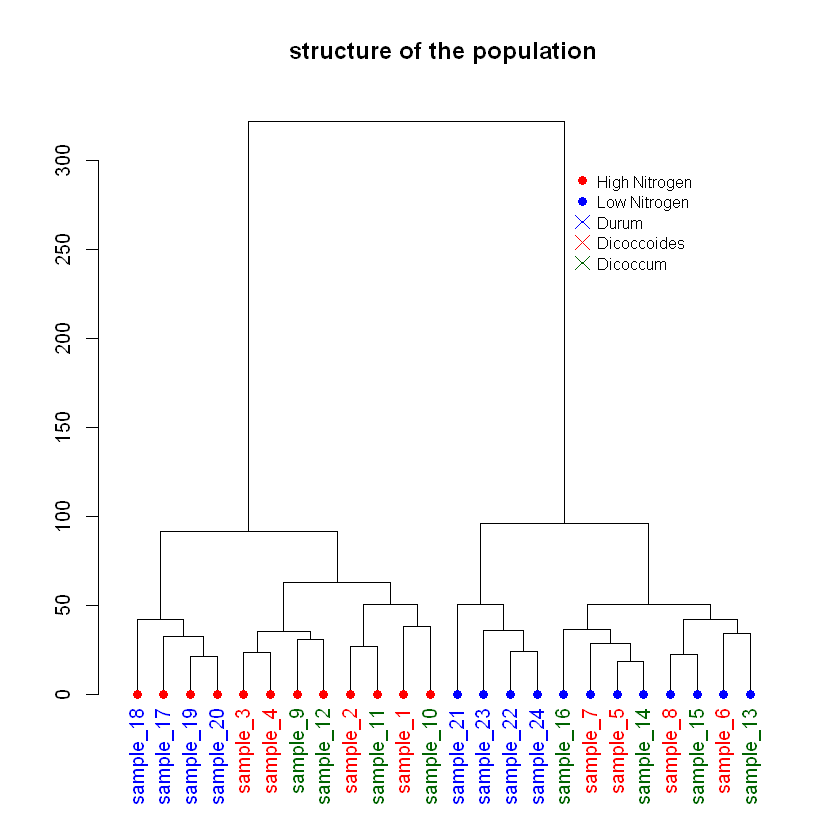

In [49]:
dL <- dendrapply(dhc, colLab)
 
plot(dL , main="structure of the population")
legend("topright", 
     legend = c("High Nitrogen" , "Low Nitrogen" , "Durum" , "Dicoccoides" , "Dicoccum"), 
     col = c("red", "blue" , "blue" , "red" , "Darkgreen"), 
     pch = c(20,20,4,4,4), bty = "n",  pt.cex = 1.5, cex = 0.8 , 
     text.col = "black", horiz = FALSE, inset = c(0.1, 0.1))


---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

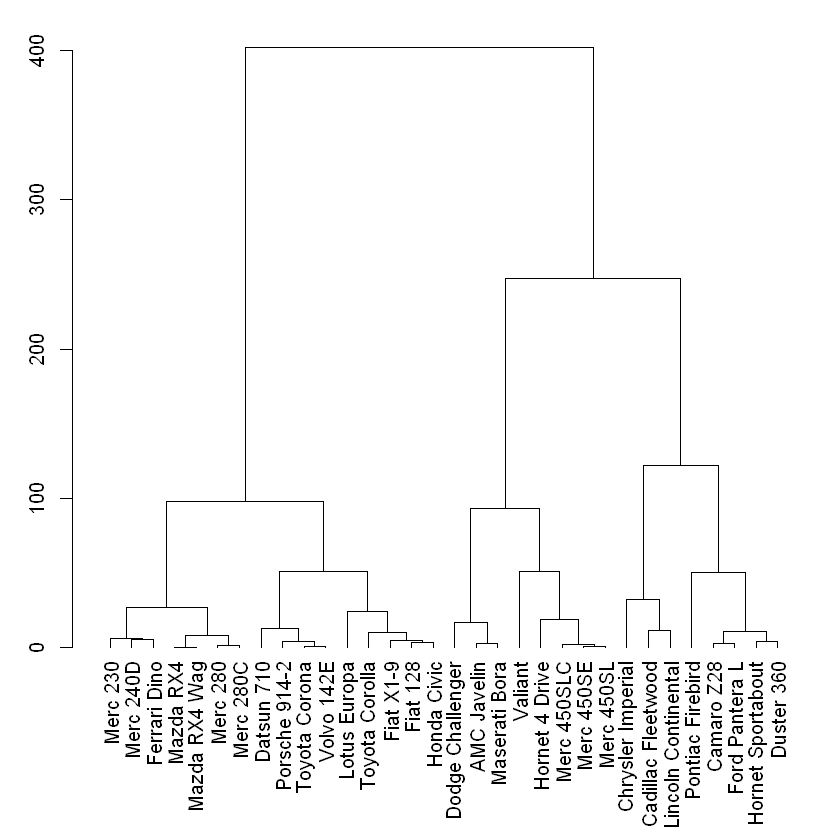

In [50]:
# Library
library(dendextend)
library(tidyverse)
 
# Data
head(mtcars)
 
# Clusterisation using 3 variables
mtcars %>% select(mpg, cyl, disp) %>% dist() %>% hclust() %>% as.dendrogram() -> dend
 
# Plot
par(mar=c(7,3,1,1))  # Increase bottom margin to have the complete label
plot(dend)

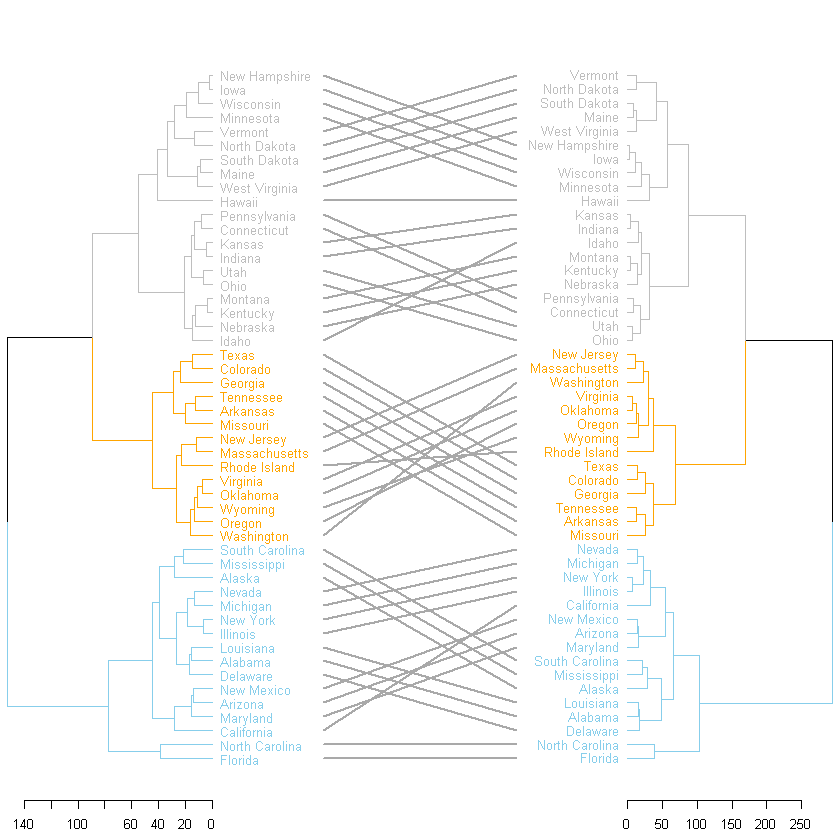

In [52]:
# Make 2 dendrograms, using 2 different clustering methods
d1 = USArrests %>% dist() %>% hclust( method="average" ) %>% as.dendrogram()
d2 = USArrests %>% dist() %>% hclust( method="complete" ) %>% as.dendrogram()
 
# Custom these kendo, and place them in a list
dl <- dendlist(
  d1 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3),
  d2 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3)
)
 
# Plot them together
tanglegram(dl, 
           common_subtrees_color_lines = FALSE, highlight_distinct_edges  = TRUE, highlight_branches_lwd=FALSE, 
           margin_inner=7,
           lwd=2
)

### CIRCULAR DENDROGRAM WITH GGRAPH


In [55]:
# install.packages("ggraph")


Installing package into 'C:/Users/WITHJS/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'udunits2', 'tweenr', 'units', 'ggforce', 'ggrepel'



package 'udunits2' successfully unpacked and MD5 sums checked
package 'tweenr' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'ggraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WITHJS\AppData\Local\Temp\RtmpOgSzWc\downloaded_packages


In [56]:
# Libraries
library(ggraph)
library(igraph)
library(tidyverse)
library(RColorBrewer) 
# create a data frame giv


Attaching package: 'igraph'

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_frame

The following object is masked from 'package:plotly':

    groups

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



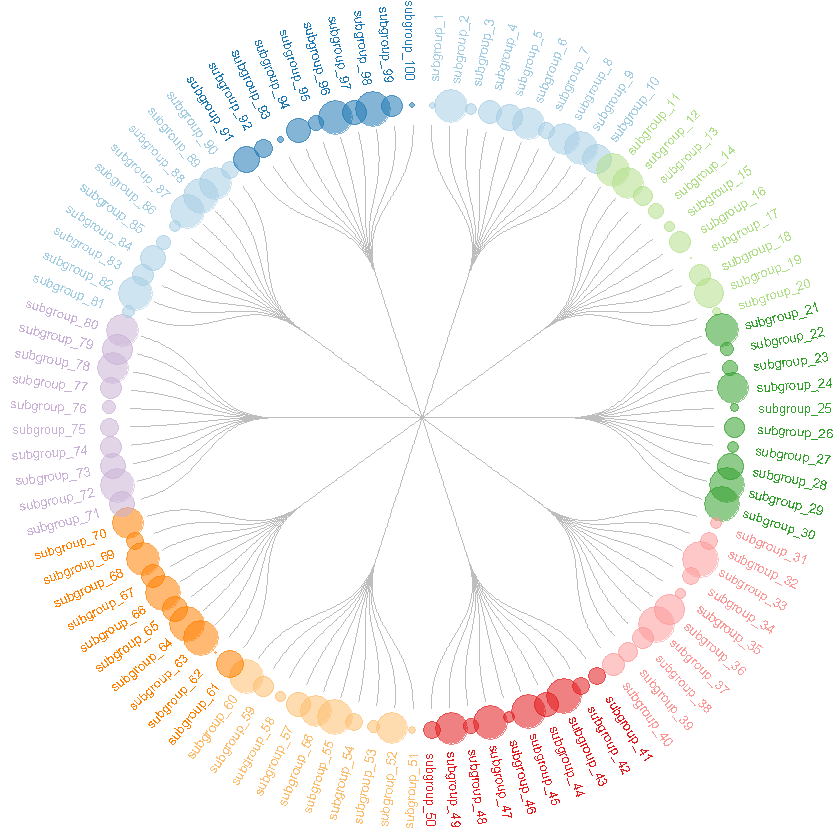

In [57]:
# create a data frame giving the hierarchical structure of your individuals
d1=data.frame(from="origin", to=paste("group", seq(1,10), sep=""))
d2=data.frame(from=rep(d1$to, each=10), to=paste("subgroup", seq(1,100), sep="_"))
edges=rbind(d1, d2)
 
# create a vertices data.frame. One line per object of our hierarchy
vertices = data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(111)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group = edges$from[ match( vertices$name, edges$to ) ]
 
 
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id=NA
myleaves=which(is.na( match(vertices$name, edges$from) ))
nleaves=length(myleaves)
vertices$id[ myleaves ] = seq(1:nleaves)
vertices$angle= 90 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust<-ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle<-ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)
 
# Create a graph object
mygraph <- graph_from_data_frame( edges, vertices=vertices )
 
# Make the plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_edge_diagonal(colour="grey") +
  scale_edge_colour_distiller(palette = "RdPu") +
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=2.7, alpha=1) +
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=value, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(9,"Paired") , 30)) +
  scale_size_continuous( range = c(0.1,10) ) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3))
 

### MAP

In [59]:
library(tidyverse)
library(maps)
library(geosphere)

### map 패키지 이용

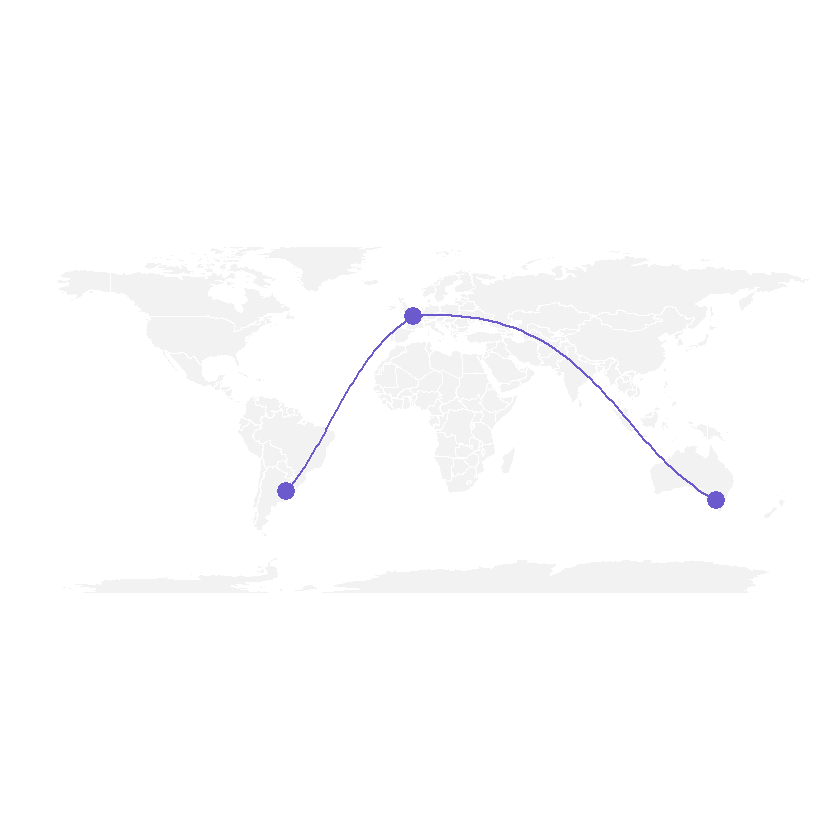

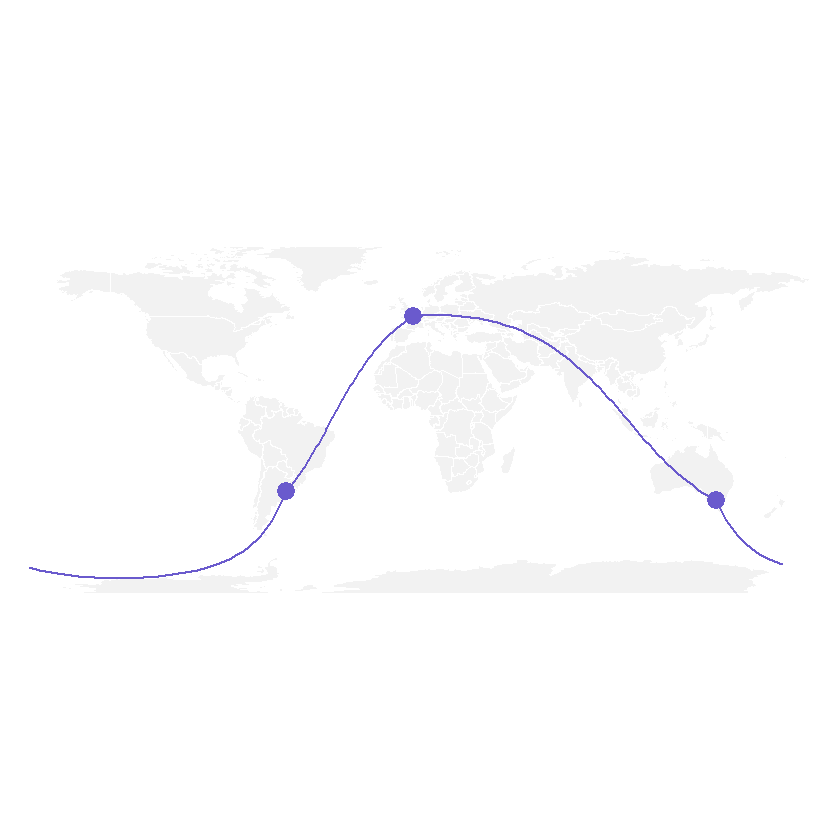

In [74]:
par(mar=c(0,0,0,0))
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )

# 3도시 추가
Buenos_aires=c(-58,-34)
Paris=c(2,49)
Melbourne=c(145,-38)
data=rbind(Buenos_aires, Paris, Melbourne) %>% as.data.frame()
colnames(data)=c("long","lat")

# 3 개의 점을 찍는다.
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)

## 선을 연결한다.
# Connection between Buenos Aires and Paris
inter <- gcIntermediate(Paris,  Buenos_aires, n=50, addStartEnd=TRUE, breakAtDateLine=F)             
lines(inter, col="slateblue", lwd=2)
 
# Between Paris and Melbourne
inter <- gcIntermediate(Melbourne,  Paris, n=50, addStartEnd=TRUE, breakAtDateLine=F)             
lines(inter, col="slateblue", lwd=2)


plot_my_connection=function( dep_lon, dep_lat, arr_lon, arr_lat, ...){
	inter <- gcIntermediate(c(dep_lon, dep_lat), c(arr_lon, arr_lat), n=50, addStartEnd=TRUE, breakAtDateLine=F)             
	inter=data.frame(inter)
	diff_of_lon=abs(dep_lon) + abs(arr_lon)
	if(diff_of_lon > 180){
		lines(subset(inter, lon>=0), ...)
		lines(subset(inter, lon<0), ...)
	}else{
		lines(inter, ...)
		}
	}

map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)
 
plot_my_connection(Paris[1], Paris[2], Melbourne[1], Melbourne[2], col="slateblue", lwd=2)
plot_my_connection(Buenos_aires[1], Buenos_aires[2], Melbourne[1], Melbourne[2], col="slateblue", lwd=2)
plot_my_connection(Buenos_aires[1], Buenos_aires[2], Paris[1], Paris[2], col="slateblue", lwd=2)
 


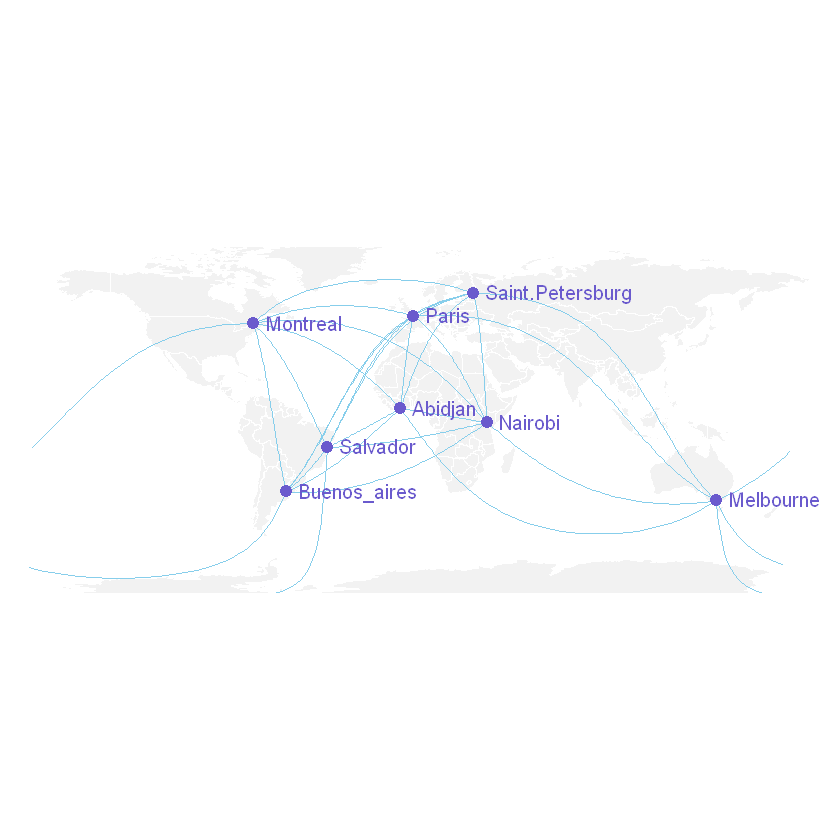

In [75]:
## 몇몇 점을 추가한 후에 다시 선을 연결한다.
data=rbind(
	Buenos_aires=c(-58,-34),
	Paris=c(2,49),
	Melbourne=c(145,-38),
	Saint.Petersburg=c(30.32, 59.93),
	Abidjan=c(-4.03, 5.33),
	Montreal=c(-73.57, 45.52),
	Nairobi=c(36.82, -1.29),
	Salvador=c(-38.5, -12.97)
	)  %>% as.data.frame()
colnames(data)=c("long","lat")
all_pairs=cbind(t(combn(data$long, 2)), t(combn(data$lat, 2))) %>% as.data.frame()
colnames(all_pairs)=c("long1","long2","lat1","lat2")

# background map
par(mar=c(0,0,0,0))
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )
 
# add every connections:
for(i in 1:nrow(all_pairs)){
	plot_my_connection(all_pairs$long1[i], all_pairs$lat1[i], all_pairs$long2[i], all_pairs$lat2[i], col="skyblue", lwd=1)
	}
 
# add points and names of cities
points(x=data$long, y=data$lat, col="slateblue", cex=2, pch=20)
text(rownames(data), x=data$long, y=data$lat,  col="slateblue", cex=1, pos=4)

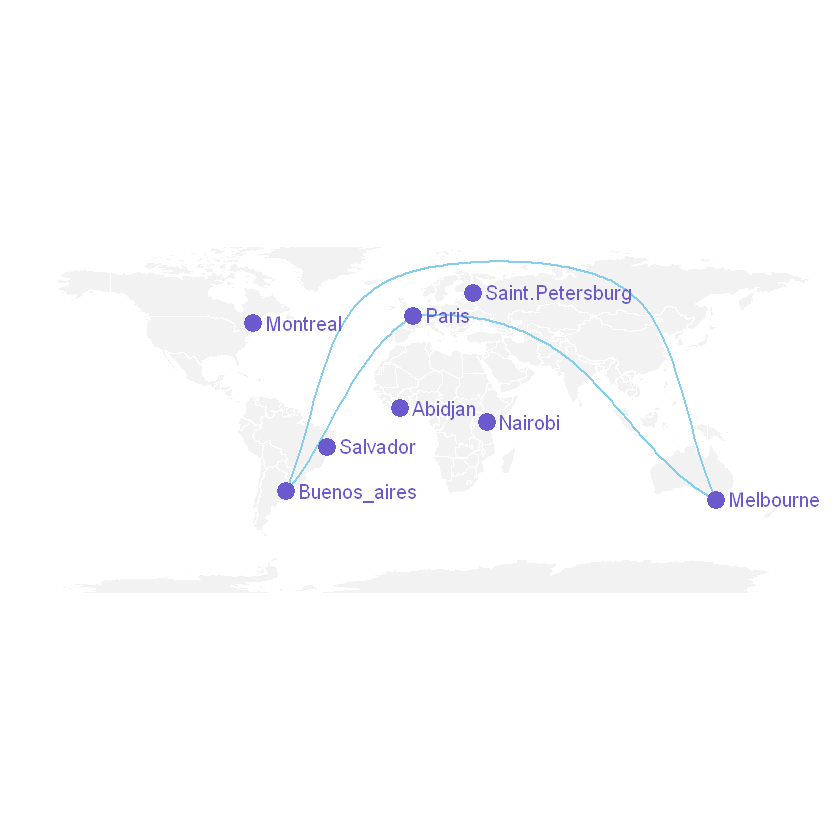

In [76]:
# A function that keeps the good part of the great circle, by Jeff Leek:
getGreatCircle = function(userLL,relationLL){
  tmpCircle = greatCircle(userLL,relationLL, n=200)
  start = which.min(abs(tmpCircle[,1] - data.frame(userLL)[1,1]))
  end = which.min(abs(tmpCircle[,1] - relationLL[1]))
  greatC = tmpCircle[start:end,]
  return(greatC)
}
 
# map 3 connections:
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )
great=getGreatCircle(Paris, Melbourne)
lines(great, col="skyblue", lwd=2)
great=getGreatCircle(Buenos_aires, Melbourne)
lines(great, col="skyblue", lwd=2)
great=getGreatCircle(Paris, Buenos_aires)
lines(great, col="skyblue", lwd=2)
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)
text(rownames(data), x=data$long, y=data$lat,  col="slateblue", cex=1, pos=4)

## 시계열


In [78]:
install.packages("dygraphs")

Installing package into 'C:/Users/WITHJS/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'dygraphs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WITHJS\AppData\Local\Temp\RtmpOgSzWc\downloaded_packages


In [83]:
# Library
library(dygraphs)
 
# --- Format 1: time is represented by a simple number. (must be numeric and ordered)
data=data.frame( time=c( seq(0,20,0.5), 40), value=runif(42))
str(data)
dygraph(data)

'data.frame':	42 obs. of  2 variables:
 $ time : num  0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 ...
 $ value: num  0.784 0.0264 0.6789 0.5444 0.5704 ...


Warning message in readChar(htmlfile, file.info(htmlfile)$size):
"UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다"

HTML widgets cannot be represented in plain text (need html)

In [81]:
# Libraries
library(dygraphs)
library(xts) # To make the convertion data-frame / xts format
 
# Format 2: time is represented by a date.
data=data.frame(time=seq(from=Sys.Date()-40, to=Sys.Date(), by=1 ), value=runif(41))
 
# Your time column MUST be a time format!, check it out with str()
str(data)
 
# Then you can create the xts format, and thus use dygraph
don=xts(x = data$value, order.by = data$time)
dygraph(don)

'data.frame':	41 obs. of  2 variables:
 $ time : Date, format: "2018-05-18" "2018-05-19" ...
 $ value: num  0.528 0.509 0.527 0.908 0.7 ...


Warning message in readChar(htmlfile, file.info(htmlfile)$size):
"UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다"

HTML widgets cannot be represented in plain text (need html)

In [82]:
# Libraries
library(dygraphs)
library(xts) # To make the convertion data-frame / xts format
 
# Format 3: Several variables for each date
data=data.frame(time=seq(from=Sys.Date()-40, to=Sys.Date(), by=1 ), value1=runif(41), value2=runif(41)+0.7)
# Then you can create the xts format:
don=xts( x=data[,-1], order.by=data$time)
dygraph(don)

Warning message in readChar(htmlfile, file.info(htmlfile)$size):
"UTF-8가 아닌 MBCS 로케일에서만 바이트로만 읽을 수 있습니다"

HTML widgets cannot be represented in plain text (need html)